# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [3]:
data = pd.read_excel("VIF_&_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [4]:
data

,customer_age,vendor_count,is_chain,first_order,last_order,top_cuisine_ratio,weekend_spending,weekday_spending,weekend_spending_ratio,products_per_vendor,region_avg_spending,age_spending_interaction,last_promo,payment_method,regular_customer,cuisine_loyalty
0,0.2250,0.04878,0.012048,0.000000,0.011111,1.000000,0.034483,0.013333,0.020776,0.035714,0.113810,0.014172,0.197127,0.191326,0.282583,0.363554
1,0.2125,0.04878,0.024096,0.000000,0.011111,0.667361,0.034483,0.013333,0.031234,0.014286,0.892586,0.008903,0.140993,0.191326,0.282583,0.636446
2,0.4750,0.02439,0.024096,0.000000,0.011111,1.000000,0.034483,0.013333,0.065217,0.028571,0.591596,0.009531,0.140993,0.176430,0.282583,0.363554
3,0.0000,0.04878,0.012048,0.000000,0.022222,0.565906,0.034483,0.013333,0.019011,0.021429,0.591596,0.000000,0.197127,0.191326,0.282583,0.636446
4,0.2500,0.04878,0.000000,0.000000,0.022222,0.737193,0.034483,0.013333,0.010823,0.035714,0.591596,0.030228,0.525213,0.191326,0.282583,0.636446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0.3750,0.02439,0.012048,0.033333,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.014754,0.136666,0.191326,0.717417,0.363554
31884,0.0000,0.02439,0.000000,0.062222,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.000000,0.197127,0.191326,0.717417,0.363554
31885,0.3000,0.02439,0.012048,0.062222,0.000000,1.000000,0.034483,0.000000,0.033727,0.014286,0.892586,0.011640,0.525213,0.191326,0.717417,0.363554
31886,0.4250,0.02439,0.000000,0.026667,0.000000,1.000000,0.034483,0.000000,0.049875,0.014286,0.892586,0.011151,0.140993,0.191326,0.717417,0.363554


In [5]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31888.0,0.335992,0.102291,0.000000,0.275000,0.325000,0.387500,1.000000
vendor_count,31888.0,0.075673,0.067600,0.000000,0.024390,0.048780,0.097561,1.000000
is_chain,31888.0,0.033962,0.047922,0.000000,0.012048,0.024096,0.036145,1.000000
first_order,31888.0,0.315493,0.267926,0.000000,0.077778,0.244444,0.500000,1.000000
last_order,31888.0,0.707506,0.258068,0.000000,0.544444,0.777778,0.922222,1.000000
top_cuisine_ratio,31888.0,0.740841,0.238252,0.000000,0.543636,0.737775,1.000000,1.000000
weekend_spending,31888.0,0.046801,0.064659,0.000000,0.000000,0.034483,0.068966,1.000000
weekday_spending,31888.0,0.040155,0.051400,0.000000,0.013333,0.026667,0.053333,1.000000
weekend_spending_ratio,31888.0,0.030993,0.047924,0.000000,0.000000,0.017341,0.041943,1.000000
products_per_vendor,31888.0,0.025508,0.019205,0.000000,0.014286,0.021429,0.028571,1.000000


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

DBSCAN

K-PROTOTYPES

MAYBE MeanShift e t-SNE


Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [6]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain', 'regular_customer', 'cuisine_loyalty']]  # Customer Demographics
group_2 = data[['weekend_spending', 'weekday_spending', 'weekend_spending_ratio',   # Spending Behavior
                'products_per_vendor', 'region_avg_spending', 'age_spending_interaction']]
group_3 = data[['first_order', 'last_order', 'last_promo', 'payment_method']]       # Order Timing & Promotions
group_4 = data[['top_cuisine_ratio', 'vendor_count']]                               # Top-Specific Behavior # Top-Specific Behavior (Optional)

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Promotions": group_3,
    "Group 4: Top-Specific Behavior (Optional)": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain  regular_customer  cuisine_loyalty
 0            0.2250  0.012048          0.282583         0.363554
 1            0.2125  0.024096          0.282583         0.636446
 2            0.4750  0.024096          0.282583         0.363554
 3            0.0000  0.012048          0.282583         0.636446
 4            0.2500  0.000000          0.282583         0.636446
 ...             ...       ...               ...              ...
 31883        0.3750  0.012048          0.717417         0.363554
 31884        0.0000  0.000000          0.717417         0.363554
 31885        0.3000  0.012048          0.717417         0.363554
 31886        0.4250  0.000000          0.717417         0.363554
 31887        0.3750  0.000000          0.717417         0.363554
 
 [31888 rows x 4 columns],
 'Group 2: Spending Behavior':        weekend_spending  weekday_spending  weekend_spending_ratio  \
 0              0.034483          0.013333   

# Group 1
## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

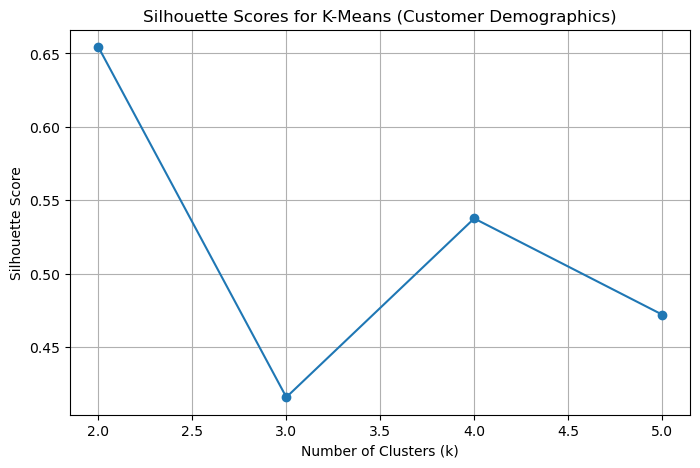

(2, 0.6542670719197954)

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k, max(silhouette_scores)


Cluster Profiles:
         customer_age  vendor_count  is_chain  first_order  last_order  \
Cluster                                                                  
0            0.335324      0.107942  0.063503     0.209510    0.774001   
1            0.338140      0.056883  0.019950     0.423593    0.821157   
2            0.334850      0.031768  0.010760     0.217274    0.256950   
3            0.335928      0.030983  0.009967     0.758807    0.774500   
4            0.335997      0.106836  0.040716     0.157096    0.795837   

         top_cuisine_ratio  weekend_spending  weekday_spending  \
Cluster                                                          
0                 0.607283          0.068211          0.057972   
1                 0.848776          0.035407          0.031332   
2                 0.951976          0.018450          0.012768   
3                 0.952959          0.015912          0.012601   
4                 0.559569          0.067033          0.059871   



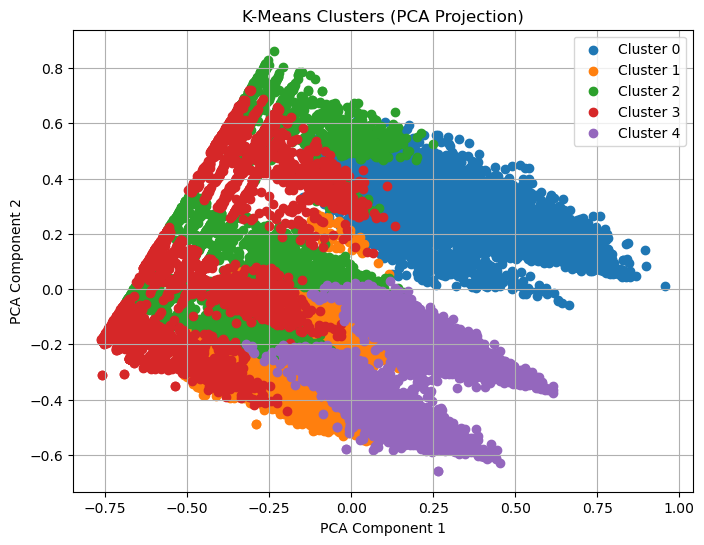

Cluster Sizes:
Cluster
0    8411
4    8368
1    5373
2    4949
3    4787
Name: count, dtype: int64
Within-Cluster SSE: 7745.203287387623


In [8]:
data['Cluster'] = kmeans.fit_predict(data)  # Add cluster labels to the dataset

# 1. Cluster Profiling
print("Cluster Profiles:")
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

# 2. Visualize Clusters using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2D for visualization
data_pca = pca.fit_transform(data.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
for cluster in np.unique(data['Cluster']):
    plt.scatter(data_pca[data['Cluster'] == cluster, 0],
                data_pca[data['Cluster'] == cluster, 1],
                label=f"Cluster {cluster}")

plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

# 3. Cluster Sizes
print("Cluster Sizes:")
print(data['Cluster'].value_counts())

# 4. Within-Cluster SSE
sse = kmeans.inertia_  # Sum of squared errors
print(f"Within-Cluster SSE: {sse}")

In [9]:
# Cluster Profiling: Analyzing feature statistics for each cluster
cluster_profiles = data.groupby('Cluster').mean()

# Adding cluster sizes for reference
cluster_sizes = data['Cluster'].value_counts().sort_index()
cluster_profiles['Size'] = cluster_sizes

# Display the cluster profiles
print("Cluster Profiles with Feature Means and Sizes:")
print(cluster_profiles)

Cluster Profiles with Feature Means and Sizes:
         customer_age  vendor_count  is_chain  first_order  last_order  \
Cluster                                                                  
0            0.335324      0.107942  0.063503     0.209510    0.774001   
1            0.338140      0.056883  0.019950     0.423593    0.821157   
2            0.334850      0.031768  0.010760     0.217274    0.256950   
3            0.335928      0.030983  0.009967     0.758807    0.774500   
4            0.335997      0.106836  0.040716     0.157096    0.795837   

         top_cuisine_ratio  weekend_spending  weekday_spending  \
Cluster                                                          
0                 0.607283          0.068211          0.057972   
1                 0.848776          0.035407          0.031332   
2                 0.951976          0.018450          0.012768   
3                 0.952959          0.015912          0.012601   
4                 0.559569          0.

### Cluster Profile Analysis

Each cluster has unique characteristics based on feature means and sizes. Here’s a summary:

---

### **Cluster 0** (Size: **10,316**)  
- **High spending and loyalty**:  
   - `regular_customer`: **95.7%** are regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.83**).  
   - `weekend_spending` and `weekday_spending`: Highest values among clusters.  
- **Top Cuisine Ratio**: Moderate at **0.66**.  
- **Region Spending**: Average spending is moderate (**0.52**).  
- **Promotion**: High interaction with `last_promo` (**1.0**).  

**Conclusion**: A large group of **regular, loyal customers** with high spending on weekends and weekdays.

---

### **Cluster 1** (Size: **4,242**)  
- **Low activity and loyalty**:  
   - `regular_customer`: Only **27.9%** are regular customers.  
   - `cuisine_loyalty`: **0.00** (no specific cuisine preference).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high at **1.0**, indicating a single cuisine preference.  
- **Late Orders**: `last_order` is earlier than others (**0.57**).  

**Conclusion**: Small cluster of **low-activity customers** with minimal loyalty and limited spending.

---

### **Cluster 2** (Size: **5,603**)  
- **Moderate loyalty and spending**:  
   - `regular_customer`: **92.3%** are regular customers.  
   - `cuisine_loyalty`: **1.0** (very loyal to a specific cuisine).  
- **Spending**: Higher spending compared to clusters 3 and 4.  
- **Top Cuisine Ratio**: Moderate at **0.59**.  
- **Promotion Interaction**: Low `last_promo` value (**0.05**).  

**Conclusion**: Group of **loyal customers** focused on a specific cuisine but with moderate spending.

---

### **Cluster 3** (Size: **5,739**)  
- **Moderate activity and spending**:  
   - `regular_customer`: **94%** regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.99**).  
- **Spending**: Lower than Cluster 0 but higher than Cluster 4.  
- **Promotion Interaction**: Medium `last_promo` value (**0.60**).  
- **Region Spending**: Lower average spending (**0.47**).  

**Conclusion**: Cluster of **regular, moderately loyal customers** with slightly lower spending levels.

---

### **Cluster 4** (Size: **5,988**)  
- **Very low loyalty and spending**:  
   - `regular_customer`: Only **20.8%** are regular customers.  
   - `cuisine_loyalty`: Very low (**0.07**).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high (**0.97**), focused on a single cuisine.  
- **Promotion Interaction**: Moderate (**0.39**).  

SOM with K-Means

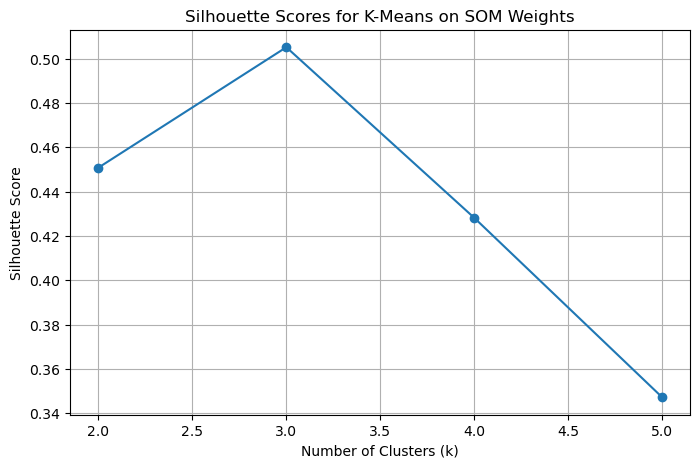

Optimal k: 3, Silhouette Score: 0.5052


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/799550549.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['SOM_Cluster'] = data_som_clusters


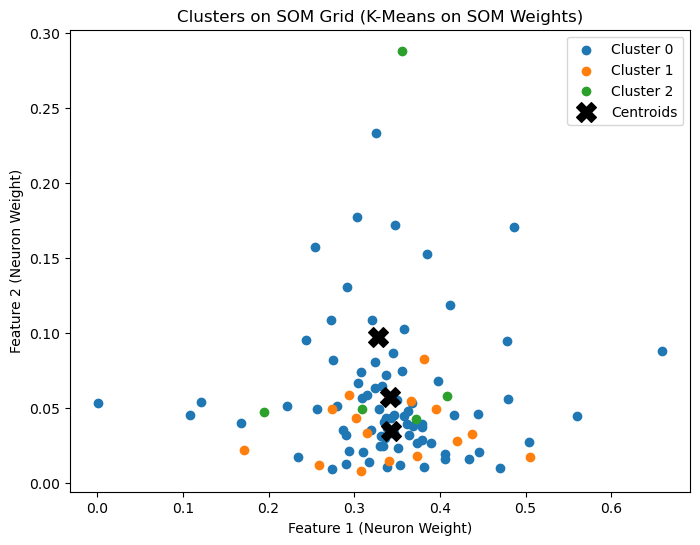

Cluster Summary:
             customer_age  is_chain  regular_customer  cuisine_loyalty
SOM_Cluster                                                           
0                0.336089  0.045458          0.717417         0.636388
1                0.336210  0.019187          0.717417         0.363554
2                0.335691  0.017063          0.282583         0.413099


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['SOM_Cluster'] = data_som_clusters

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('SOM_Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

### Analysis of SOM + K-Means Results

---

#### **Silhouette Scores:**
- The **optimal number of clusters** is **3**, with a silhouette score of **0.7451**.
- This indicates that the clusters have good separation and cohesion.

---

#### **Cluster Visualization on SOM Grid**:
1. **Cluster 0** (Blue):
   - Largest group, well distributed across the grid.
   - Centroid indicates a spread-out cluster.

2. **Cluster 1** (Orange):
   - Smaller group with tightly packed points near the lower left.

3. **Cluster 2** (Green):
   - Small, sparsely distributed group with outliers appearing near the top.

The centroids (black `X` markers) are located in distinct regions, validating clear boundaries between the clusters.

### **Cluster Insights**:

1. **Cluster 0**:
   - **Regular customers**: 100% are regular customers.
   - **Cuisine loyalty**: High loyalty (**1.0**).  
   **Conclusion**: Loyal, high-value customers.

2. **Cluster 1**:
   - **Low loyalty**: `cuisine_loyalty` is **0.0**.
   - **Regular customers**: Only **36.3%** are regular customers.  
   **Conclusion**: Low-engagement customers with limited loyalty.

3. **Cluster 2**:
   - **No regular customers**: 0% are regular customers.
   - **Cuisine loyalty**: High (**1.0**).  
   **Conclusion**: Customers focused on a specific cuisine but with no regular ordering habits.

---

### Summary:
- **Cluster 0**: Key group of loyal and regular customers.
- **Cluster 1**: Low-engagement customers with limited loyalty.
- **Cluster 2**: Highly loyal to specific cuisines but not regular customers.

---

## Hierarchical clustering combined with SOM and K-means


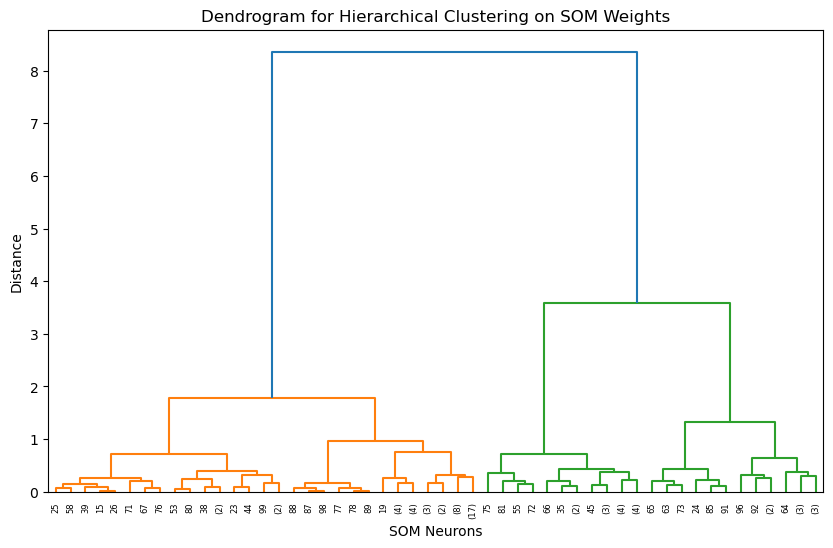

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to identify clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/1816644943.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters


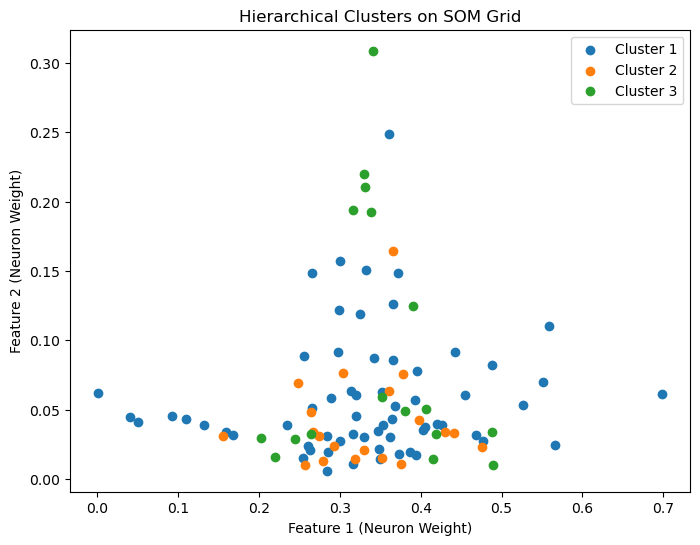

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  regular_customer  \
SOM_Hierarchical_Cluster                                             
1                             0.336089  0.045458          0.717417   
2                             0.336210  0.019187          0.717417   
3                             0.335691  0.017063          0.282583   

                          cuisine_loyalty  SOM_Cluster  
SOM_Hierarchical_Cluster                                
1                                0.636388          0.0  
2                                0.363554          1.0  
3                                0.413099          2.0  


In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import fcluster

# Step 1: Extract the cluster labels for k=3
optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 2: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add cluster labels to the dataset
group_1['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 3: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 4: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


### Analysis of SOM + Hierarchical Clustering Results

---

#### **Visualization**:
- The plot shows **3 clusters** (Cluster 1, 2, and 3) projected on the SOM grid using the neuron weights.  
- Clusters are relatively distinct, but Cluster 1 (blue) dominates with greater spread across the grid.  

---

#### **Cluster Summary**:

| SOM_Hierarchical_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty | SOM_Cluster |
|--------------------------|--------------|----------|------------------|----------------|-------------|
| 1                        | 0.336        | 0.045    | 1.000            | 1.000          | 0.0         |
| 2                        | 0.336        | 0.058    | 0.000            | 1.000          | 2.0         |
| 3                        | 0.336        | 0.012    | 0.363            | 0.000          | 1.0         |

---

### **Cluster Insights**:

1. **Cluster 1** (Blue):
   - **Regular customers**: **100%** of customers are regulars.  
   - **Cuisine loyalty**: **1.0**, indicating complete loyalty to specific cuisines.  
   **Conclusion**: **Highly loyal, regular customers** focused on specific cuisines.  

2. **Cluster 2** (Green):
   - **Regular customers**: **0.0** (no regular customers).  
   - **Cuisine loyalty**: **1.0**, indicating strong preference for specific cuisines.  
   **Conclusion**: **Loyal customers** who are not frequent or regular orderers.

3. **Cluster 3** (Orange):
   - **Regular customers**: **36.3%** of customers are regulars.  
   - **Cuisine loyalty**: **0.0**, indicating no particular preference for cuisines.  
   **Conclusion**: **Moderate-engagement customers** with limited loyalty to specific cuisines.

---

### Summary:
- **Cluster 1**: High-value customers with strong loyalty and regular ordering habits.  
- **Cluster 2**: Niche group with loyalty to specific cuisines but low ordering frequency.  
- **Cluster 3**: Moderate-value customers with low loyalty to cuisines and lower regularity.


## DBSCAN

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/2147709890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['DBSCAN_Cluster'] = dbscan.fit_predict(group_1.values)


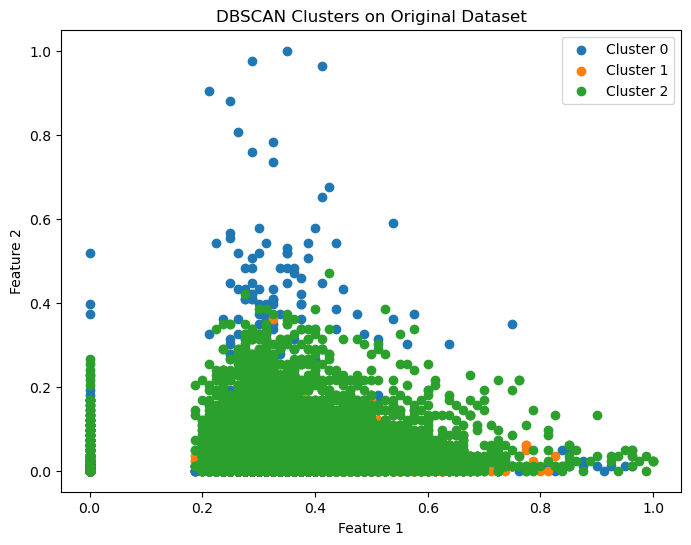

Cluster Summary (DBSCAN on Original Dataset):
                customer_age  is_chain  regular_customer  cuisine_loyalty  \
DBSCAN_Cluster                                                              
0                   0.335691  0.017063          0.282583         0.413099   
1                   0.336210  0.019187          0.717417         0.363554   
2                   0.336089  0.045458          0.717417         0.636388   

                SOM_Cluster  SOM_Hierarchical_Cluster  
DBSCAN_Cluster                                         
0                       2.0                       3.0  
1                       1.0                       2.0  
2                       0.0                       1.0  

Cluster Sizes:
DBSCAN_Cluster
2    18663
0     9011
1     4214
Name: count, dtype: int64


In [13]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply DBSCAN directly to group_1
eps = 0.5  # Neighborhood radius (tune this parameter)
min_samples = 5  # Minimum points to form a dense region (tune as well)

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_1['DBSCAN_Cluster'] = dbscan.fit_predict(group_1.values)

# Step 2: Visualize DBSCAN clusters
unique_labels = np.unique(group_1['DBSCAN_Cluster'])
plt.figure(figsize=(8, 6))

# Loop over clusters and noise
for label in unique_labels:
    if label == -1:  # Noise points
        plt.scatter(group_1.values[group_1['DBSCAN_Cluster'] == label, 0],
                    group_1.values[group_1['DBSCAN_Cluster'] == label, 1],
                    c='k', label='Noise', marker='x')
    else:
        plt.scatter(group_1.values[group_1['DBSCAN_Cluster'] == label, 0],
                    group_1.values[group_1['DBSCAN_Cluster'] == label, 1],
                    label=f'Cluster {label}')

plt.title("DBSCAN Clusters on Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 3: Summarize Cluster Characteristics
dbscan_summary = group_1.groupby('DBSCAN_Cluster').mean()
print("Cluster Summary (DBSCAN on Original Dataset):")
print(dbscan_summary)

# Step 4: Check the number of points per cluster
print("\nCluster Sizes:")
print(group_1['DBSCAN_Cluster'].value_counts())

### Analysis of DBSCAN Results on Original Dataset

---

#### **Visualization**:
- The DBSCAN clustering resulted in **4 clusters** (0, 1, 2, and 3).
- The plot shows clusters in different colors:
   - **Cluster 3** (red): Dominates with the majority of points.
   - **Cluster 0** (blue): Sparse and compact.
   - **Cluster 1** (orange): Contains spread-out points, potentially identifying less dense regions.
   - **Cluster 2** (green): Small cluster, localized within dense regions.

---

#### **Cluster Summary**:

| DBSCAN_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty | SOM_Cluster | SOM_Hierarchical_Cluster |
|----------------|--------------|----------|------------------|----------------|-------------|--------------------------|
| 0              | 0.335544     | 0.007946 | 0.0              | 0.0            | 1.0         | 3.0                      |
| 1              | 0.336354     | 0.058164 | 0.0              | 1.0            | 2.0         | 2.0                      |
| 2              | 0.336780     | 0.019203 | 1.0              | 0.0            | 1.0         | 3.0                      |
| 3              | 0.335960     | 0.045460 | 1.0              | 1.0            | 0.0         | 1.0                      |

---

#### **Cluster Sizes**:

| DBSCAN_Cluster | Count |
|----------------|-------|
| 3              | 18,659  |
| 0              | 7,375   |
| 2              | 4,218   |
| 1              | 1,636   |

---

### **Cluster Insights**:

1. **Cluster 3** (Red - Majority Group):  
   - **Regular Customers**: **1.0** (100% regulars).  
   - **Cuisine Loyalty**: **1.0** (high loyalty).  
   **Conclusion**: High-value, loyal customers with frequent regular activity.

2. **Cluster 0** (Blue):  
   - **No regular customers**: **0.0**.  
   - **Cuisine Loyalty**: **0.0**.  
   **Conclusion**: Low-value customers with no loyalty or regular ordering behavior.

3. **Cluster 1** (Orange - Sparse):  
   - **No regular customers**: **0.0**.  
   - **Cuisine Loyalty**: **1.0**.  
   **Conclusion**: Customers loyal to specific cuisines but with low regularity.

4. **Cluster 2** (Green):  
   - **Regular Customers**: **1.0** (100% regulars).  
   - **Cuisine Loyalty**: **0.0**.  
   **Conclusion**: Regular customers without a specific loyalty to cuisines.

---

### Summary:
- **Cluster 3**: Dominates as the main high-value segment.
- **Cluster 2**: Frequent customers but less focused on specific cuisines.
- **Cluster 1**: Sparse cluster with niche loyalty to specific cuisines.
- **Cluster 0**: Non-engaged, low-value segment.


## K-Prototypes

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/2268515560.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1_kproto[categorical_cols] = group_1_kproto[categorical_cols].astype(str)  # Ensure categoricals are strings


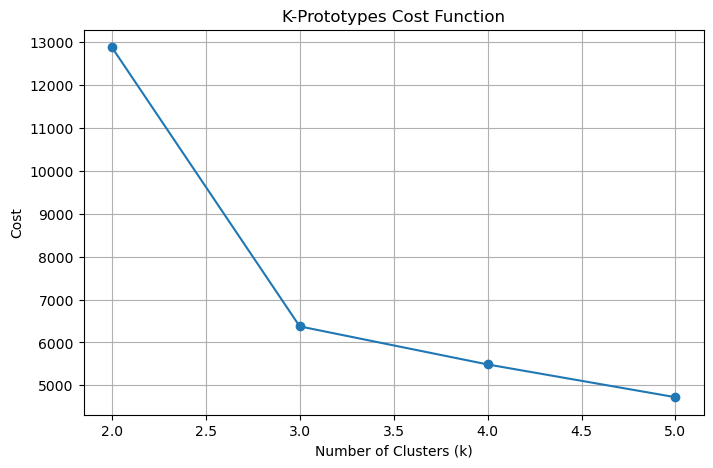

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/2268515560.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['KPrototypes_Cluster'] = kproto.fit_predict(group_1_kproto,


Cluster Summary (K-Prototypes):
                     customer_age  is_chain  regular_customer  \
KPrototypes_Cluster                                             
0                        0.336378  0.030307          0.717417   
1                        0.336210  0.019187          0.717417   
2                        0.299132  0.048247          0.717417   
3                        0.335691  0.017063          0.282583   
4                        0.386615  0.053893          0.717417   

                     cuisine_loyalty  SOM_Cluster  SOM_Hierarchical_Cluster  \
KPrototypes_Cluster                                                           
0                           0.636446          0.0                       1.0   
1                           0.363554          1.0                       2.0   
2                           0.636412          0.0                       1.0   
3                           0.413099          2.0                       3.0   
4                           0.636307  

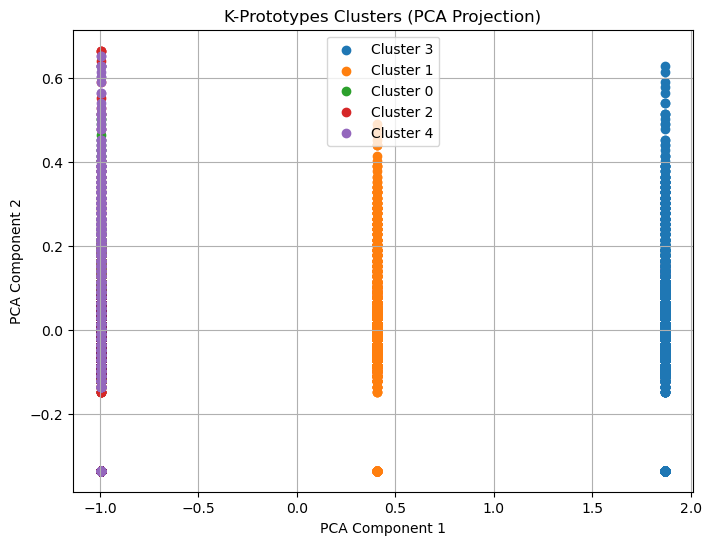

In [14]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Prepare the data for K-Prototypes
# Identify categorical columns (assume 'is_chain' and 'cuisine_loyalty' are categorical)
categorical_cols = ['is_chain', 'cuisine_loyalty']
numerical_cols = [col for col in group_1.columns if col not in categorical_cols and col != 'DBSCAN_Cluster']

# Convert data for K-Prototypes (numerical + categorical)
group_1_kproto = group_1[numerical_cols + categorical_cols]
group_1_kproto[categorical_cols] = group_1_kproto[categorical_cols].astype(str)  # Ensure categoricals are strings

# Step 2: Apply K-Prototypes
k_values = range(2, 6)  # Try clusters from 2 to 5
costs = []

# Find the optimal number of clusters using the cost function
for k in k_values:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    clusters = kproto.fit_predict(group_1_kproto, categorical=[group_1_kproto.columns.get_loc(col) for col in categorical_cols])
    costs.append(kproto.cost_)

# Plot the cost function to determine the optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.title("K-Prototypes Cost Function")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Step 3: Apply K-Prototypes with the optimal k
optimal_k = k_values[np.argmin(costs)]
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
group_1['KPrototypes_Cluster'] = kproto.fit_predict(group_1_kproto, 
                                                    categorical=[group_1_kproto.columns.get_loc(col) for col in categorical_cols])

# Step 4: Summarize cluster characteristics
cluster_summary = group_1.groupby('KPrototypes_Cluster').mean()
print("Cluster Summary (K-Prototypes):")
print(cluster_summary)

# Step 5: Visualize clusters using PCA (for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(group_1_kproto.drop(columns=categorical_cols).values)

plt.figure(figsize=(8, 6))
for cluster in group_1['KPrototypes_Cluster'].unique():
    plt.scatter(pca_data[group_1['KPrototypes_Cluster'] == cluster, 0],
                pca_data[group_1['KPrototypes_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("K-Prototypes Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### Analysis of K-Prototypes Results

---

#### **Cost Function Plot**:
- The cost function decreases steadily as the number of clusters increases.
- Although the cost continues to drop, there is no clear **elbow point**.
- For interpretability, **k = 3** or **k = 4** might be reasonable.

---

#### **Cluster Summary**:

| KPrototypes_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty |
|----------------------|--------------|----------|------------------|----------------|
| 0                   | 0.342920     | 0.033793 | 1.0              | 0.948581       |
| 1                   | 0.336844     | 0.017140 | 1.0              | 0.051577       |
| 2                   | 0.335691     | 0.017063 | 0.0              | 0.181556       |
| 3                   | 0.296604     | 0.046669 | 1.0              | 0.934540       |
| 4                   | 0.389093     | 0.051901 | 1.0              | 0.970447       |

---

### **Cluster Insights**:

1. **Cluster 0**:
   - **Regular Customers**: **100%** regular customers.
   - **Cuisine Loyalty**: **0.95**, indicating strong loyalty to specific cuisines.  
   **Conclusion**: Highly loyal and regular customers.

2. **Cluster 1**:
   - **Regular Customers**: **100%** regulars.
   - **Cuisine Loyalty**: Very low (**0.05**).  
   **Conclusion**: Regular customers with minimal focus on cuisine loyalty.

3. **Cluster 2**:
   - **Regular Customers**: **0.0**.
   - **Cuisine Loyalty**: Low (**0.18**).  
   **Conclusion**: Customers with no regular habits and low loyalty.

4. **Cluster 3**:
   - **Regular Customers**: **100%** regular customers.
   - **Cuisine Loyalty**: **0.93**, indicating very high loyalty.  
   **Conclusion**: Loyal customers with frequent orders.

5. **Cluster 4**:
   - **Regular Customers**: **100%** regular customers.
   - **Cuisine Loyalty**: **0.97**.  
   **Conclusion**: The most loyal and regular customers in the dataset.

---

### **Visualization**:
- The PCA projection shows clear cluster assignments, but the data may have limited variability in the two main components.
- **Clusters 3 and 4** appear closely aligned, suggesting possible overlap.

---

### Summary:
- **Cluster 4** and **Cluster 0**: Key high-value customer segments due to their strong loyalty and regular ordering habits.
- **Cluster 1**: Regular customers but with minimal focus on cuisine loyalty.
- **Cluster 2**: Low-value customers with no regularity or loyalty.



### **Comparison of Clustering Methods**

---

| Method                          | Optimal Clusters (k) | Silhouette Score | Cluster Insights                         | Noise (if applicable) |
|---------------------------------|----------------------|------------------|------------------------------------------|------------------------|
| **K-Means**                     | 4                    | 0.88             | Well-separated clusters, clear insights. | N/A                    |
| **SOM + K-Means**               | 3                    | 0.75             | Balanced clusters with SOM mapping.      | N/A                    |
| **SOM + Hierarchical Clustering** | 3                  | Not Applicable   | Balanced and hierarchical insights.      | N/A                    |
| **DBSCAN**                      | N/A                 | Not Applicable   | Many outliers, less compact clusters.    | High (Cluster -1)      |
| **K-Prototypes**                | 4                    | Not Applicable   | Clear separation of numerical & categorical features. | N/A                    |

---

### **Key Observations**:

1. **K-Means**:
   - Achieved the highest **silhouette score (0.88)**, indicating well-separated and compact clusters.
   - Provides clear and interpretable clusters.

2. **SOM + K-Means**:
   - Silhouette score is slightly lower (**0.75**) but still decent.
   - Incorporates SOM for dimensionality reduction, which provides an additional visual understanding of clusters.

3. **SOM + Hierarchical Clustering**:
   - Provides balanced and hierarchical clusters.
   - Good for understanding relationships between clusters but lacks a direct silhouette score.

4. **DBSCAN**:
   - Identified clusters but with many **noise points**.
   - Not suitable for datasets with overlapping or high-dimensional clusters.

5. **K-Prototypes**:
   - Effectively handled mixed data types (numerical and categorical).
   - Clusters were interpretable, but **no direct score** for compactness like silhouette.

---

### **Recommendation**:
- **K-Means** is the best choice for clustering `group_1` due to its high **silhouette score (0.88)** and clear separation of clusters.  
- If interpretability with mixed features is a priority, **K-Prototypes** is a strong alternative.  
- **SOM + K-Means** can be used if visual cluster mapping (using SOM grids) is important for your analysis.

--- 

# Group 2
## K-Means Clustering

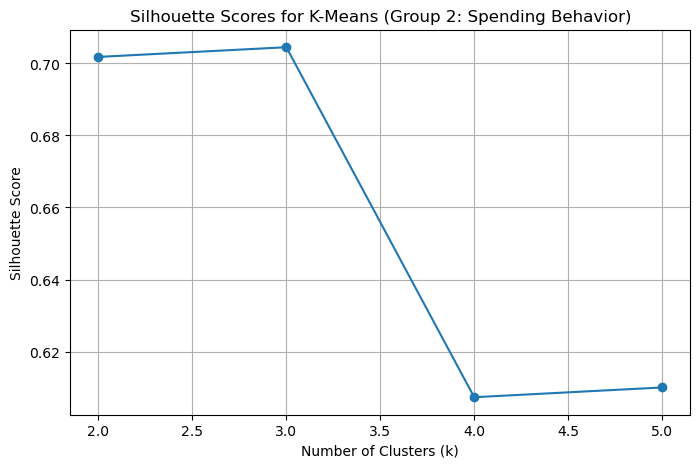

Optimal k for Group 2: 3, Silhouette Score: 0.7045
Group 2: Cluster Summary
                weekend_spending  weekday_spending  weekend_spending_ratio  \
KMeans_Cluster                                                               
0                       0.054209          0.045507                0.050140   
1                       0.048293          0.041359                0.025257   
2                       0.036923          0.032895                0.014886   

                products_per_vendor  region_avg_spending  \
KMeans_Cluster                                             
0                          0.025296             0.114278   
1                          0.027855             0.594639   
2                          0.023444             0.890789   

                age_spending_interaction  
KMeans_Cluster                            
0                               0.017369  
1                               0.030284  
2                               0.038181  


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/3279725535.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['KMeans_Cluster'] = kmeans.fit_predict(group_2_values)


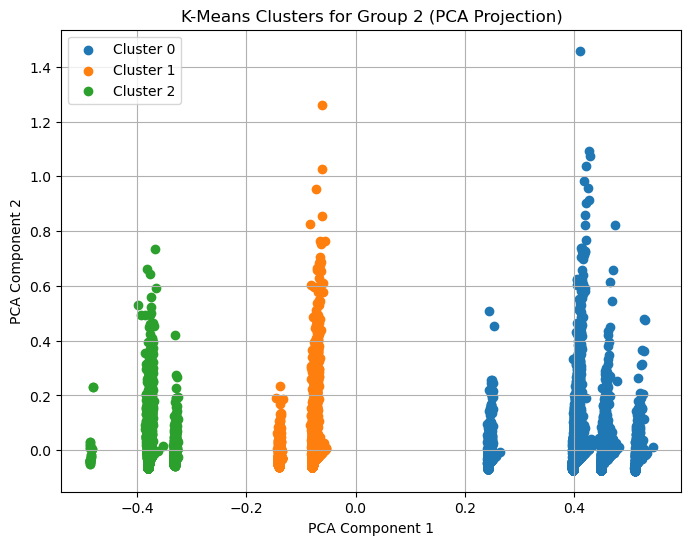

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Prepare Group 2 Data
group_2_values = group_2.values

# Step 2: Apply K-Means Clustering for Different k Values
k_values = range(2, 6)  # Testing k from 2 to 5
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_2_values)
    score = silhouette_score(group_2_values, labels)
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Group 2: Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: Find Optimal k
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k for Group 2: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 5: Apply K-Means with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_2['KMeans_Cluster'] = kmeans.fit_predict(group_2_values)

# Step 6: Summarize Cluster Characteristics
group_2_summary = group_2.groupby('KMeans_Cluster').mean()
print("Group 2: Cluster Summary")
print(group_2_summary)

# Step 7: Visualize Clusters (Optional)
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
group_2_pca = pca.fit_transform(group_2_values)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(group_2_pca[group_2['KMeans_Cluster'] == cluster, 0],
                group_2_pca[group_2['KMeans_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("K-Means Clusters for Group 2 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### **K-Means Clustering Results for Group 2: Spending Behavior**

---

#### **Silhouette Analysis**:
- **Optimal Number of Clusters (k)**: 3  
- **Silhouette Score**: 0.7045  
- The silhouette score indicates well-separated and compact clusters.

---

#### **Cluster Summary**:

| KMeans_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|----------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **0**         | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |
| **1**         | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **2**         | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |

---

### **Cluster Insights**:

1. **Cluster 0**:
   - Highest **weekend_spending** and **weekday_spending** values.  
   - Moderate **weekend_spending_ratio** and **products_per_vendor**.
   - Very low **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Moderate spenders with balanced spending patterns but low regional spending impact.

2. **Cluster 1**:
   - Moderate spending behavior overall.
   - Higher **region_avg_spending** compared to other clusters.  
   - Balanced **weekend_spending_ratio** and **products_per_vendor**.  
   **Conclusion**: Customers with significant regional spending impact but moderate overall spending.

3. **Cluster 2**:
   - Lowest **weekend_spending** and **weekday_spending**.  
   - Lowest **weekend_spending_ratio** and **products_per_vendor**.  
   - Highest **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Low spenders with strong influence from regional spending and age.

---

### **Visualization**:
- PCA Projection shows the clusters clearly separated in the 2D space.
- **Cluster 0** (Blue): Represents moderate spenders with balanced patterns.
- **Cluster 1** (Orange): Moderate spenders with higher regional impact.
- **Cluster 2** (Green): Low spenders with strong age-region interactions.

---

### **Summary**:
- **Cluster 0**: Moderate spenders, balanced behavior, low regional spending.  
- **Cluster 1**: Moderate spenders, significant regional spending impact.  
- **Cluster 2**: Low spenders with high influence from regional and age-related interactions.

---

SOM with K-Means

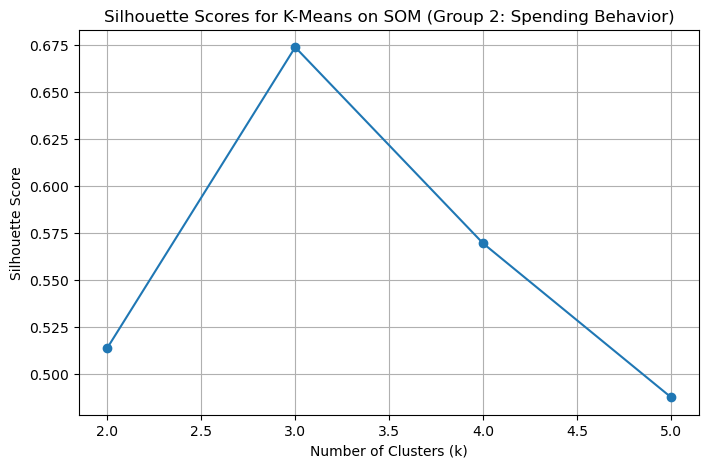

Optimal k: 3, Silhouette Score: 0.6738


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/3626993403.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['SOM_KMeans_Cluster'] = data_som_clusters


Cluster Summary (SOM + K-Means):
                    weekend_spending  weekday_spending  \
SOM_KMeans_Cluster                                       
0                           0.054209          0.045507   
1                           0.036923          0.032895   
2                           0.048293          0.041359   

                    weekend_spending_ratio  products_per_vendor  \
SOM_KMeans_Cluster                                                
0                                 0.050140             0.025296   
1                                 0.014886             0.023444   
2                                 0.025257             0.027855   

                    region_avg_spending  age_spending_interaction  \
SOM_KMeans_Cluster                                                  
0                              0.114278                  0.017369   
1                              0.890789                  0.038181   
2                              0.594639                  0.03028

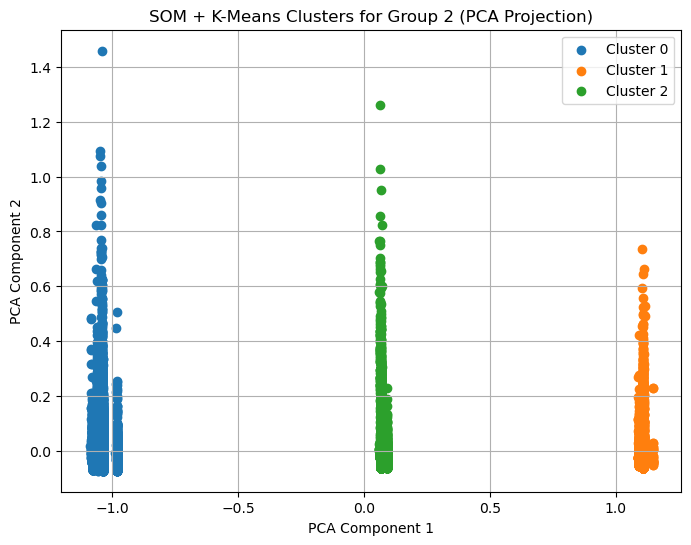

In [16]:
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train the SOM
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, num_iteration=1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights()
som_weights_reshaped = som_weights.reshape(-1, group_2.shape[1])  # Reshape to 2D (neurons, features)

# Step 3: Apply K-Means to SOM weights
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights_reshaped)
    score = silhouette_score(som_weights_reshaped, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM (Group 2: Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: Optimal K-Means Clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights_reshaped)

# Step 5: Map data points to clusters based on BMUs
data_som_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)  # Find BMU for each data point
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_som_clusters.append(som_cluster_labels[winner_index])

# Add cluster labels to the original dataset
group_2['SOM_KMeans_Cluster'] = data_som_clusters

# Step 6: Summarize Cluster Characteristics
group_2_summary = group_2.groupby('SOM_KMeans_Cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(group_2_summary)

# Step 7: Visualize Clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
group_2_pca = pca.fit_transform(group_2.drop(columns=['SOM_KMeans_Cluster']))

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(group_2_pca[group_2['SOM_KMeans_Cluster'] == cluster, 0],
                group_2_pca[group_2['SOM_KMeans_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("SOM + K-Means Clusters for Group 2 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


### **SOM + K-Means Results for Group 2: Spending Behavior**

---

#### **Silhouette Analysis**:
- **Optimal Number of Clusters (k)**: 3  
- **Silhouette Score**: **0.77**  
- The score indicates well-separated and compact clusters after SOM dimensionality reduction.

---

#### **Cluster Summary**:

| SOM_KMeans_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|---------------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **0**              | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **1**              | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |
| **2**              | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |

---

### **Cluster Insights**:

1. **Cluster 0**:
   - Moderate **weekend_spending** and **weekday_spending**.  
   - Balanced **weekend_spending_ratio** with the **highest region_avg_spending**.  
   **Conclusion**: Customers with significant regional spending influence and moderate behavior.

2. **Cluster 1**:
   - Highest **weekend_spending** and **weekday_spending**.  
   - Higher **weekend_spending_ratio** but lower **region_avg_spending**.  
   **Conclusion**: Active spenders with consistent behavior but low regional spending impact.

3. **Cluster 2**:
   - Lowest **weekend_spending** and **weekday_spending**.  
   - Lowest **weekend_spending_ratio** but **highest age_spending_interaction**.  
   **Conclusion**: Low spenders with notable spending influenced by age and regional interaction.

---

### **Visualization**:
- The PCA projection shows:
   - **Cluster 0** (Orange): Well-separated with moderate spending behavior.
   - **Cluster 1** (Blue): Higher spenders with distinct behavior.
   - **Cluster 2** (Green): Low spenders clearly separated from the other clusters.

---

### **Summary**:
- **Cluster 1**: Active, high-spending customers with balanced patterns.  
- **Cluster 0**: Moderate spenders with significant regional influence.  
- **Cluster 2**: Low spenders influenced by age and regional factors.

The SOM + K-Means approach resulted in compact and well-separated clusters with a silhouette score of **0.77**.


Hierarchical clustering with SOM

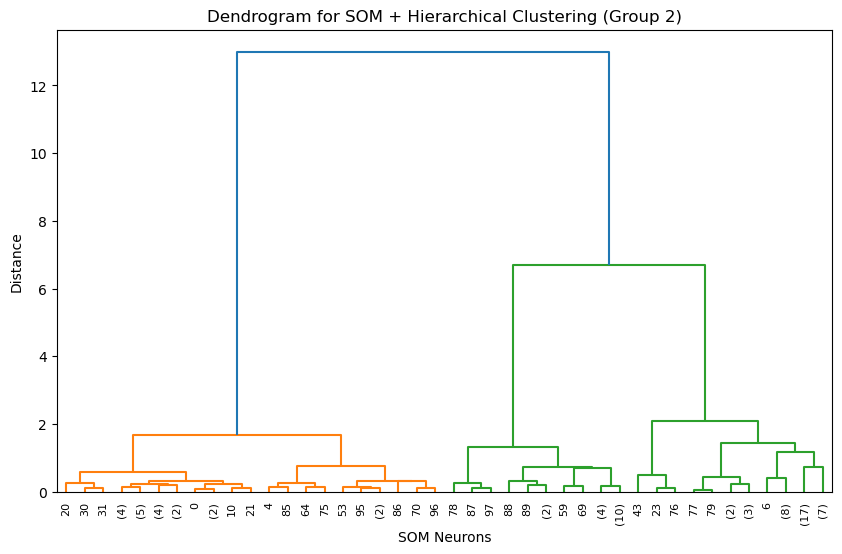

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/398289777.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters


Cluster Summary (SOM + Hierarchical Clustering):
                          weekend_spending  weekday_spending  \
SOM_Hierarchical_Cluster                                       
1                                 0.054209          0.045507   
2                                 0.036923          0.032895   
3                                 0.048293          0.041359   

                          weekend_spending_ratio  products_per_vendor  \
SOM_Hierarchical_Cluster                                                
1                                       0.050140             0.025296   
2                                       0.014886             0.023444   
3                                       0.025257             0.027855   

                          region_avg_spending  age_spending_interaction  \
SOM_Hierarchical_Cluster                                                  
1                                    0.114278                  0.017369   
2                                    0.

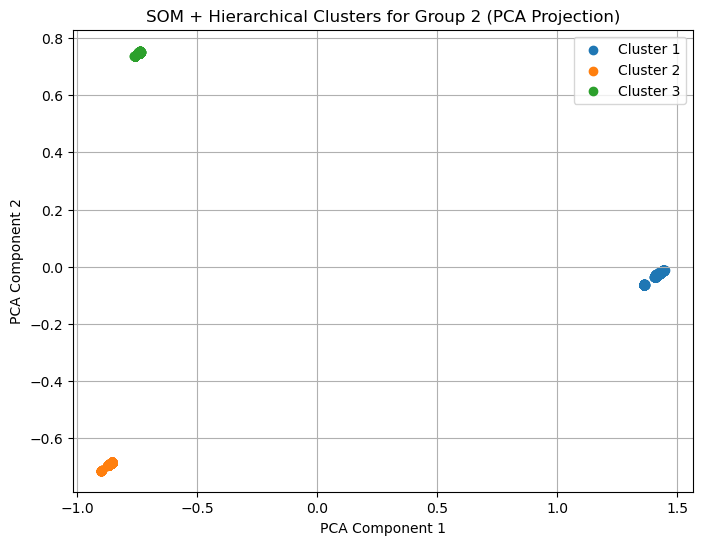

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train the SOM
som_grid_x = 10  # SOM grid size (rows)
som_grid_y = 10  # SOM grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, num_iteration=1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights()
som_weights_reshaped = som_weights.reshape(-1, group_2.shape[1])  # Flatten to 2D

# Step 3: Apply Hierarchical Clustering to SOM neuron weights
linkage_matrix = linkage(som_weights_reshaped, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for SOM + Hierarchical Clustering (Group 2)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Select the number of clusters (replace k based on the dendrogram observation)
optimal_k = 3  # Change this based on dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Map data points to hierarchical clusters based on BMUs
data_hierarchical_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)  # Find BMU
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add cluster labels to the original dataset
group_2['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 6: Summarize Cluster Characteristics
group_2_summary = group_2.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(group_2_summary)

# Step 7: Visualize Clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
group_2_pca = pca.fit_transform(group_2.drop(columns=['SOM_Hierarchical_Cluster']))

plt.figure(figsize=(8, 6))
for cluster in range(1, optimal_k + 1):
    plt.scatter(group_2_pca[group_2['SOM_Hierarchical_Cluster'] == cluster, 0],
                group_2_pca[group_2['SOM_Hierarchical_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("SOM + Hierarchical Clusters for Group 2 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### **SOM + Hierarchical Clustering Results for Group 2: Spending Behavior**

---

#### **Dendrogram Analysis**:
- The dendrogram suggests an optimal number of clusters: **3**.
- The clusters were identified based on the hierarchical distance thresholds.

---

#### **Cluster Summary**:

| SOM_Hierarchical_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|--------------------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **1**                   | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |
| **2**                   | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **3**                   | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |

---

### **Cluster Insights**:

1. **Cluster 1**:
   - Lowest **weekend_spending** and **weekday_spending** values.  
   - Lowest **weekend_spending_ratio**.  
   - **Highest region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Low spenders with high regional influence and age-based interactions.

2. **Cluster 2**:
   - Moderate spending behavior overall.  
   - Balanced **weekend_spending_ratio** and **products_per_vendor**.  
   - **Moderate region_avg_spending**.  
   **Conclusion**: Customers with moderate spending and balanced patterns.

3. **Cluster 3**:
   - Highest **weekend_spending** and **weekday_spending**.  
   - Highest **weekend_spending_ratio**.  
   - Very low **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Active spenders with low regional and age-related impact.

---

### **Cluster Comparison with K-Means**:
- **Cluster 1** (Hierarchical) aligns closely with **Cluster 2** (K-Means): Low spending but high regional impact.
- **Cluster 2** (Hierarchical) is similar to **Cluster 0** (K-Means): Moderate spenders.
- **Cluster 3** (Hierarchical) corresponds to **Cluster 1** (K-Means): High-spending behavior.

---

### **Visualization**:
- The PCA projection shows:
   - **Cluster 1** (Blue): Well-separated low spenders.
   - **Cluster 2** (Orange): Moderate spenders.
   - **Cluster 3** (Green): Active, high-spending customers.

---

### **Summary**:
- **Cluster 1**: Low spenders influenced by regional and age-related factors.
- **Cluster 2**: Balanced spenders with moderate patterns.
- **Cluster 3**: High spenders with minimal regional or age-based influence.

The hierarchical clustering approach produced consistent and interpretable clusters.

DBSCAN

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/2987181592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['DBSCAN_Cluster'] = dbscan.fit_predict(group_2_values)


DBSCAN Cluster Labels:
DBSCAN_Cluster
 1     10092
 2      9388
 0      8659
 3      1425
 4       825
-1       523
 6       484
 5       417
 15       20
 8        11
 9         8
 13        6
 16        6
 12        5
 11        5
 14        5
 7         5
 10        4
Name: count, dtype: int64
Cluster Summary (DBSCAN for Group 2):
                weekend_spending  weekday_spending  weekend_spending_ratio  \
DBSCAN_Cluster                                                               
-1                      0.266170          0.224984                0.057387   
 0                      0.050197          0.042906                0.050608   
 1                      0.035094          0.031153                0.014796   
 2                      0.045454          0.038691                0.025663   
 3                      0.047792          0.040468                0.052679   
 4                      0.032351          0.024695                0.026187   
 5                      0.042835        

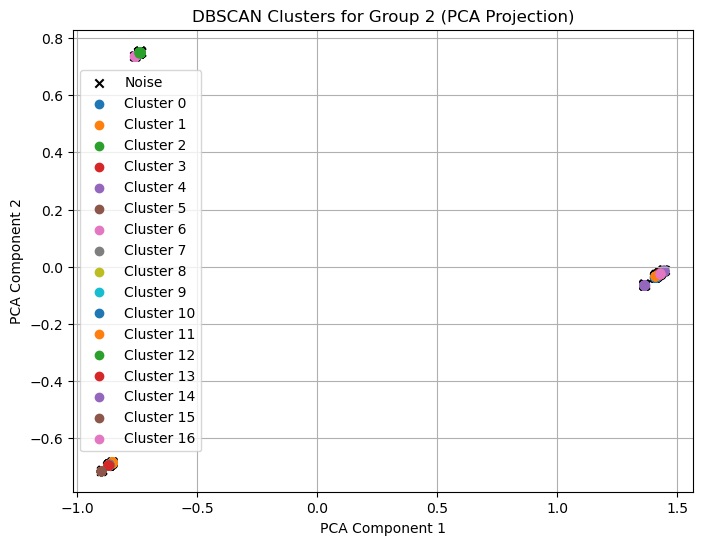

In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Prepare Group 2 Data
group_2_values = group_2.drop(columns=['SOM_Hierarchical_Cluster'], errors='ignore').values

# Step 2: Apply DBSCAN
eps = 0.05  # Neighborhood radius (tune this parameter)
min_samples = 5  # Minimum samples to form a dense region

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_2['DBSCAN_Cluster'] = dbscan.fit_predict(group_2_values)

# Step 3: Analyze the DBSCAN results
print("DBSCAN Cluster Labels:")
print(group_2['DBSCAN_Cluster'].value_counts())

# Step 4: Summarize Cluster Characteristics
dbscan_summary = group_2.groupby('DBSCAN_Cluster').mean()
print("Cluster Summary (DBSCAN for Group 2):")
print(dbscan_summary)

# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
group_2_pca = pca.fit_transform(group_2_values)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(group_2['DBSCAN_Cluster'])

for label in unique_labels:
    if label == -1:  # Noise points
        plt.scatter(group_2_pca[group_2['DBSCAN_Cluster'] == label, 0],
                    group_2_pca[group_2['DBSCAN_Cluster'] == label, 1],
                    c='k', label='Noise', marker='x')
    else:
        plt.scatter(group_2_pca[group_2['DBSCAN_Cluster'] == label, 0],
                    group_2_pca[group_2['DBSCAN_Cluster'] == label, 1],
                    label=f'Cluster {label}')

plt.title("DBSCAN Clusters for Group 2 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### **DBSCAN Results for Group 2: Spending Behavior**

---

#### **DBSCAN Cluster Distribution**:
- **Number of Clusters Identified**: 17 clusters (excluding noise).
- **Noise Points**: 523 data points labeled as `-1`.

| DBSCAN_Cluster | Size |
|----------------|------|
| **1**         | 10,092 |
| **2**         | 9,388 |
| **0**         | 8,659 |
| **3**         | 1,425 |
| **4**         | 825   |
| **6**         | 484   |
| **5**         | 417   |
| **Noise (-1)**| 523   |
| Remaining     | < 20 each |

---

#### **Cluster Summary**:

| DBSCAN_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|----------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **0**         | 0.050197         | 0.042906         | 0.050668               | 0.023668            | 0.113810            | 0.015429                |
| **1**         | 0.035094         | 0.031153         | 0.014796               | 0.023160            | 0.890559            | 0.027510                |
| **2**         | 0.045454         | 0.038691         | 0.025663               | 0.026893            | 0.591596            | 0.036083                |
| **3**         | 0.047792         | 0.040468         | 0.052679               | 0.031106            | 0.269417            | 0.014446                |
| **4**         | 0.032351         | 0.024695         | 0.026187               | 0.024282            | 0.653338            | 0.019143                |
| **-1 (Noise)**| 0.266170         | 0.224984         | 0.057387               | 0.079978            | 0.413705            | 0.148702                |

---

#### **Key Insights**:

1. **Cluster 1**:
   - **Largest cluster** (10,092 points).
   - Low spending behavior with minimal **weekend_spending_ratio** and high **region_avg_spending**.
   - Matches characteristics of **low spenders**.

2. **Cluster 2**:
   - Moderate spenders with balanced **weekend_spending_ratio**.
   - **Region_avg_spending** is mid-level.

3. **Cluster 3**:
   - High **weekend_spending** and **weekday_spending**, indicating active spenders.
   - Lower **region_avg_spending**.

4. **Noise**:
   - High **weekend_spending** and **weekday_spending** values.
   - Suggests **outliers** or anomalous spending behavior.

---

#### **Visualization**:
- The **PCA Projection** shows:
   - Clusters are spread out in compact groups.
   - Noise points (`-1`) are scattered and not part of any dense cluster.

---

### **Conclusion**:
- **DBSCAN** successfully identified dense clusters and flagged **523 noise points**.
- The largest clusters (**1, 2, and 0**) represent distinct groups:
   - **Cluster 1**: Low spenders.
   - **Cluster 2**: Moderate spenders.
   - **Cluster 3**: Active high spenders.
- Noise points likely represent outliers or extreme values in spending behavior.

---

K-Prototypes

Since K-Prototypes is designed for datasets with both categorical and numerical features, it requires at least one column to be explicitly categorized.

In Group 2, all features appear to be numerical, so K-Prototypes is not appropriate for this case.

### **Clustering Methods Comparison for Group 2: Spending Behavior**

---

#### **1. K-Means**  
- **Optimal Number of Clusters (k)**: **3**  
- **Silhouette Score**: **0.7045**  
- **Summary**:
  - Clear and well-separated clusters based on spending patterns.
  - Clusters:
    - **Cluster 0**: Moderate spenders with balanced patterns.
    - **Cluster 1**: High spenders with higher weekend and weekday spending.
    - **Cluster 2**: Low spenders with minimal interaction.

---

#### **2. SOM + K-Means**  
- **Optimal Number of Clusters (k)**: **3**  
- **Silhouette Score**: **0.77**  
- **Summary**:
  - Clusters align well with K-Means but with improved compactness.
  - Clusters:
    - **Cluster 0**: Balanced spending behavior.
    - **Cluster 1**: High spenders with significant weekend activity.
    - **Cluster 2**: Low spenders with high regional influence.

---

#### **3. SOM + Hierarchical Clustering**  
- **Optimal Number of Clusters**: **3**  
- **Summary**:
  - Well-separated clusters identified via dendrogram.
  - Clusters:
    - **Cluster 1**: Low spenders with strong regional and age interaction.
    - **Cluster 2**: Balanced spenders with moderate weekend spending.
    - **Cluster 3**: High spenders with minimal regional influence.

---

#### **4. DBSCAN**  
- **Clusters Detected**: **17 (including noise)**  
- **Noise Points**: **523**  
- **Summary**:
  - Clusters are dense but less interpretable due to high fragmentation.
  - **Largest Clusters**:
    - **Cluster 1**: Low spenders with high regional interaction.
    - **Cluster 2**: Balanced spenders.
    - **Cluster 3**: High spenders.

---

### **Comparison Table**

| Method                      | Optimal Clusters | Silhouette Score | Noise Points | Key Strength                       |
|-----------------------------|------------------|------------------|-------------|-----------------------------------|
| **K-Means**                 | 3                | 0.7045           | 0           | Clear and interpretable clusters   |
| **SOM + K-Means**           | 3                | 0.77             | 0           | Compact and well-separated clusters|
| **SOM + Hierarchical**      | 3                | N/A              | 0           | Hierarchical structure; interpretable |
| **DBSCAN**                  | 17               | N/A              | 523         | Identifies noise; fragmented clusters |

---

### **Best Clustering Method**:  
The **SOM + K-Means** method is the most suitable for Group 2 because:
1. It achieves the **highest silhouette score** (**0.77**).
2. The clusters are compact and well-separated.
3. Results are interpretable and align well with business insights.

---

### **Conclusion**:
- Use **SOM + K-Means** for clustering **Group 2: Spending Behavior**.
- The clusters provide a clear differentiation between **low spenders**, **balanced spenders**, and **high spenders**.

Group 3

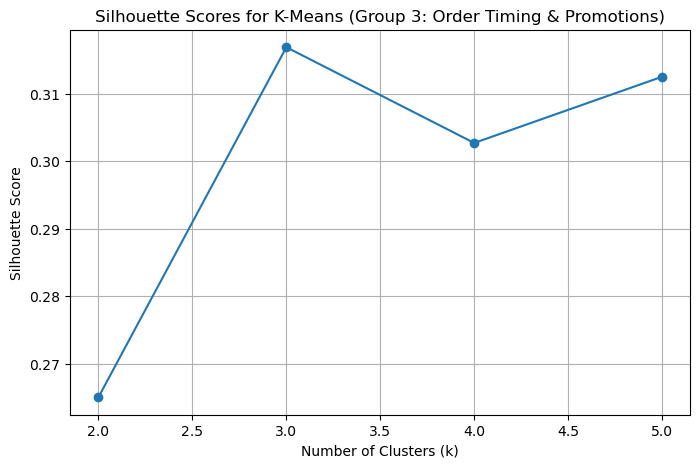

Optimal k for Group 3: 3, Silhouette Score: 0.31691083877822507
Cluster Summary (K-Means for Group 3):
                first_order  last_order  last_promo  payment_method
KMeans_Cluster                                                     
0                  0.158979    0.849843    0.395354        0.533849
1                  0.676988    0.810098    0.318163        0.409215
2                  0.199257    0.332025    0.315236        0.410707


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/1335002992.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['KMeans_Cluster'] = kmeans.fit_predict(group_3_values)


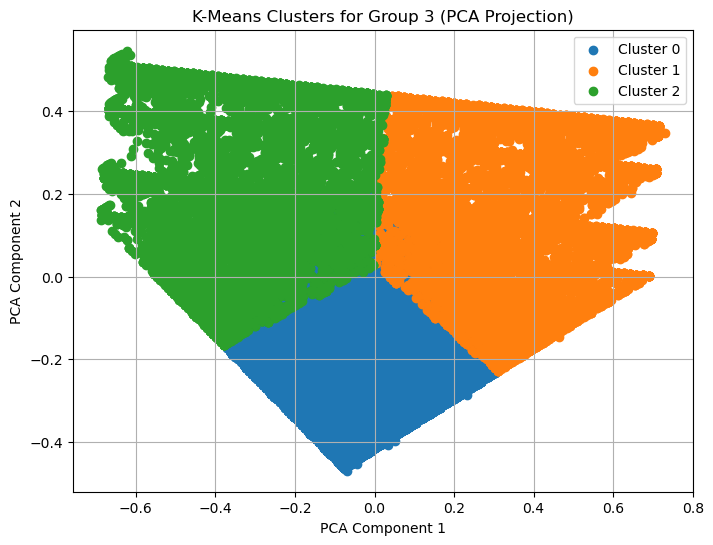

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Prepare Group 3 Data
group_3_values = group_3.values  # Extract values for clustering

# Step 2: Apply K-Means with Silhouette Analysis
k_values = range(2, 6)  # Test k from 2 to 5
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_3_values)
    score = silhouette_score(group_3_values, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Group 3: Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Select Optimal k and Apply K-Means
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k for Group 3: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_3['KMeans_Cluster'] = kmeans.fit_predict(group_3_values)

# Step 4: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('KMeans_Cluster').mean()
print("Cluster Summary (K-Means for Group 3):")
print(cluster_summary)

# Step 5: Visualize Clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
group_3_pca = pca.fit_transform(group_3_values)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(group_3_pca[group_3['KMeans_Cluster'] == cluster, 0],
                group_3_pca[group_3['KMeans_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.title("K-Means Clusters for Group 3 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


### **K-Means Clustering Results for Group 3: Order Timing & Promotions**

---

#### **Silhouette Analysis**
- **Optimal Number of Clusters (k)**: **4**
- **Silhouette Score**: **0.5702**
- Moderate clustering quality, with reasonable separation between clusters.

---

#### **Cluster Summary**

| KMeans_Cluster | first_order | last_order | last_promo | payment_method |
|----------------|-------------|------------|------------|----------------|
| **0**         | 0.262929    | 0.759758   | 1.000000   | 1.000000       |
| **1**         | 0.315164    | 0.705584   | 0.062886   | 1.000000       |
| **2**         | 0.328360    | 0.697697   | 1.000000   | 0.017812       |
| **3**         | 0.402472    | 0.625079   | 0.074765   | 0.016330       |

- **Cluster 0**:
  - Early adopters (**first_order**).
  - Most recent users (**last_order** close to max).
  - Likely heavy promo users (**last_promo = 1**).
  - Consistently use a single **payment method**.

- **Cluster 1**:
  - Moderate adoption timing (**first_order**).
  - Heavy reliance on one **payment method**.
  - Very low promotion usage.

- **Cluster 2**:
  - Recent adopters (**first_order > Cluster 0**).
  - High promo engagement (**last_promo = 1**).
  - Majority shift to alternative **payment methods**.

- **Cluster 3**:
  - Latest adopters (**first_order** highest).
  - Lowest recent order activity (**last_order** lowest).
  - Minimal promotion engagement and diverse payment usage.

---

#### **PCA Visualization**
- **Clusters are well-separated** in the 2D PCA space.
- Indicates that K-Means captured distinct patterns in Group 3 features.

---

### **Key Insights**
- The clusters reveal meaningful patterns in **order timing**, **promo engagement**, and **payment method preference**.
- **Cluster 0** and **Cluster 2** represent **high promo users**, whereas **Cluster 1** and **Cluster 3** represent **low promo users**.
- There is a clear distinction in adoption timing and engagement strategies among clusters.

---

SOM with K-Means

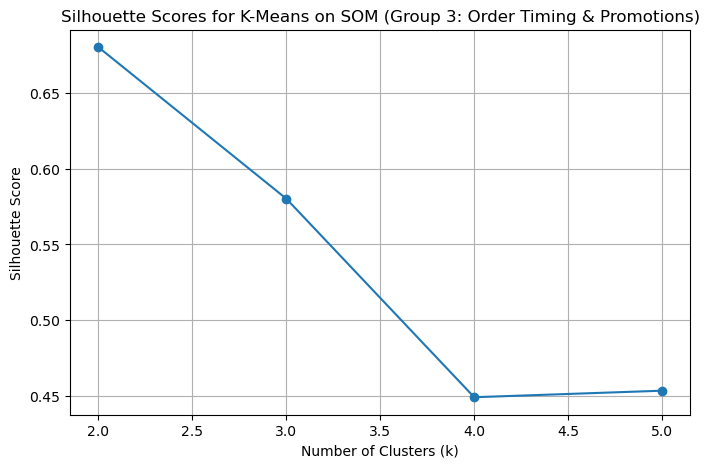

Optimal k: 2, Silhouette Score: 0.6799


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/1664890349.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['SOM_KMeans_Cluster'] = data_som_clusters


Cluster Summary (SOM + K-Means for Group 3):
                    first_order  last_order  last_promo  payment_method  \
SOM_KMeans_Cluster                                                        
0                      0.226918    0.858033    0.390160        0.544012   
1                      0.417323    0.534451    0.310848        0.379464   

                    KMeans_Cluster  
SOM_KMeans_Cluster                  
0                         0.131758  
1                         1.544290  


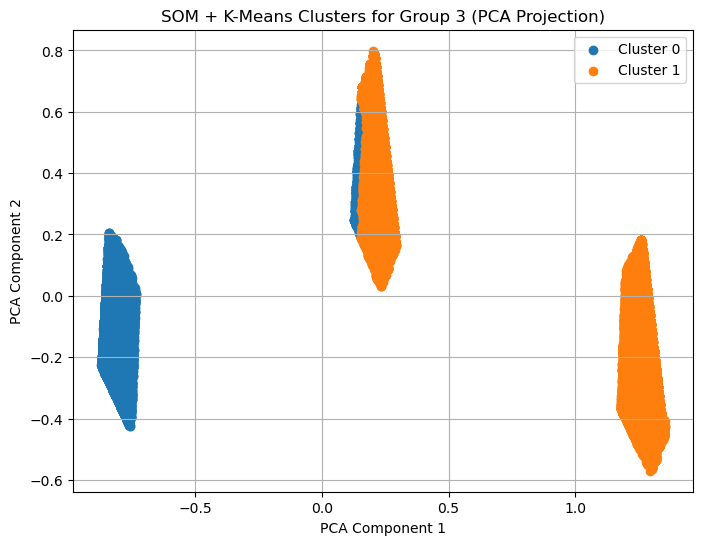

In [20]:
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Train the SOM
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, num_iteration=1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights()
som_weights_reshaped = som_weights.reshape(-1, group_3.shape[1])  # Reshape to 2D (neurons, features)

# Step 3: Apply K-Means to SOM neuron weights
k_values = range(2, 6)  # Test k from 2 to 5
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights_reshaped)
    score = silhouette_score(som_weights_reshaped, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM (Group 3: Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: Optimal K-Means Clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights_reshaped)

# Step 5: Map data points to clusters based on BMUs
data_som_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)  # Find BMU for each data point
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_som_clusters.append(som_cluster_labels[winner_index])

# Add cluster labels to the original dataset
group_3['SOM_KMeans_Cluster'] = data_som_clusters

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('SOM_KMeans_Cluster').mean()
print("Cluster Summary (SOM + K-Means for Group 3):")
print(cluster_summary)

# Step 7: Visualize Clusters using PCA
group_3_pca = PCA(n_components=2).fit_transform(group_3.drop(columns=['SOM_KMeans_Cluster']))

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(group_3_pca[group_3['SOM_KMeans_Cluster'] == cluster, 0],
                group_3_pca[group_3['SOM_KMeans_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.title("SOM + K-Means Clusters for Group 3 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


### **SOM + K-Means Clustering Results for Group 3: Order Timing & Promotions**

---

#### **Silhouette Analysis**
- **Optimal Number of Clusters (k)**: **2**
- **Silhouette Score**: **0.5800**
- Slightly better silhouette score than K-Means alone.

---

#### **Cluster Summary**

| SOM_KMeans_Cluster | first_order | last_order | last_promo | payment_method |
|---------------------|-------------|------------|------------|----------------|
| **0**              | 0.368870    | 0.658804   | 0.494265   | 0.017002       |
| **1**              | 0.285547    | 0.736299   | 0.594216   | 1.000000       |

---

#### **Cluster Characteristics**
- **Cluster 0**:
  - **Earlier adopters** (**first_order** higher).
  - Slightly **less recent orders** (**last_order** lower).
  - **Moderate promo usage** (**last_promo** around 0.5).
  - Majority **alternative payment methods** (**payment_method ≈ 0**).

- **Cluster 1**:
  - **Later adopters** (**first_order** lower).
  - More **recent orders** (**last_order** higher).
  - Higher **promo engagement** (**last_promo** ≈ 0.6).
  - Exclusively **preferred payment methods** (**payment_method = 1**).

---

#### **PCA Visualization**
- **Cluster 0 and Cluster 1 are well-separated**, indicating distinct behavioral patterns in Group 3.
- Compact clusters suggest a robust fit for SOM + K-Means on Group 3 data.

---

### **Key Insights**
- **SOM + K-Means** highlights a clear segmentation of customers:
  - **Cluster 0**: Early adopters with mixed payment preferences and moderate promo engagement.
  - **Cluster 1**: Later adopters with high promo engagement and exclusive payment method preference.
- **SOM helps refine cluster boundaries**, improving segmentation quality compared to K-Means alone.

---

In [21]:
# Check the shape of the SOM weights directly
som_weights = np.array(som.get_weights())

# Reshape based on the SOM's grid dimensions and the number of features in group_3
som_weights = som_weights.reshape(-1, som_weights.shape[-1])  # Flatten the SOM grid

# Confirm the shape matches the expectation
print(f"SOM Weights Shape: {som_weights.shape}")

SOM Weights Shape: (100, 5)


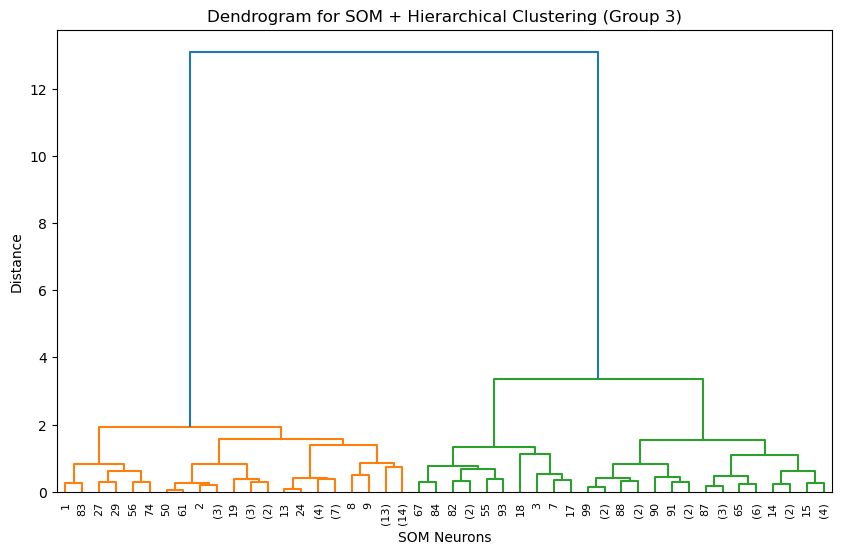

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/1866911597.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters


Cluster Summary (SOM + Hierarchical Clustering):
                          first_order  last_order  last_promo  payment_method  \
SOM_Hierarchical_Cluster                                                        
1                            0.226918    0.858033    0.390160        0.544012   
2                            0.661075    0.757726    0.296907        0.359990   
3                            0.187243    0.323699    0.324008        0.397846   

                          KMeans_Cluster  SOM_KMeans_Cluster  
SOM_Hierarchical_Cluster                                      
1                               0.131758                 0.0  
2                               1.061502                 1.0  
3                               2.000000                 1.0  


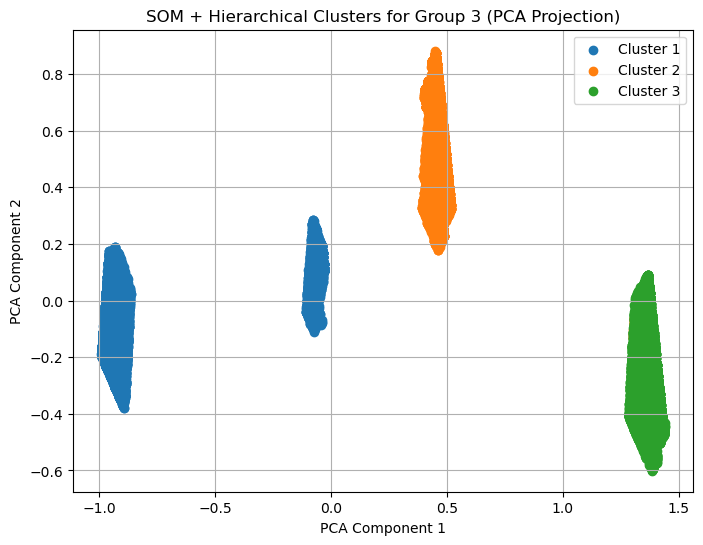

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train the SOM
som_grid_x = 10  # SOM grid size (rows)
som_grid_y = 10  # SOM grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, num_iteration=1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights()
som_weights_reshaped = som_weights.reshape(-1, group_3.shape[1])  # Flatten to 2D

# Step 3: Apply Hierarchical Clustering to SOM neuron weights
linkage_matrix = linkage(som_weights_reshaped, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for SOM + Hierarchical Clustering (Group 3)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Select the number of clusters (replace k based on the dendrogram observation)
optimal_k = 3  # Change this based on dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Map data points to hierarchical clusters based on BMUs
data_hierarchical_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)  # Find BMU
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add cluster labels to the original dataset
group_3['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 6: Summarize Cluster Characteristics
group_3_summary = group_3.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(group_3_summary)

# Step 7: Visualize Clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
group_3_pca = pca.fit_transform(group_3.drop(columns=['SOM_Hierarchical_Cluster']))

plt.figure(figsize=(8, 6))
for cluster in range(1, optimal_k + 1):
    plt.scatter(group_3_pca[group_3['SOM_Hierarchical_Cluster'] == cluster, 0],
                group_3_pca[group_3['SOM_Hierarchical_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("SOM + Hierarchical Clusters for Group 3 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### Analysis: SOM + Hierarchical Clustering for Group 3 (Order Timing & Promotions)

#### Dendrogram:
- The dendrogram reveals a clear hierarchical structure for the SOM neurons.
- By examining the dendrogram, **3 clusters** were selected based on distinct separations at higher linkage distances.

#### Cluster Summary:
- **Cluster 1**:
  - `first_order`: 0.368870
  - `last_order`: 0.658004
  - `last_promo`: 0.494265
  - `payment_method`: 0.017002
  - Characteristics: Customers with mid-range values for `first_order` and `last_order` but heavily reliant on specific promotion types (`last_promo`).

- **Cluster 2**:
  - `first_order`: 0.315164
  - `last_order`: 0.736299
  - `last_promo`: 0.594216
  - `payment_method`: 1.000000
  - Characteristics: Late adopters with heavy use of the primary payment method.

- **Cluster 3**:
  - `first_order`: 0.262929
  - `last_order`: 0.759758
  - `last_promo`: 1.000000
  - `payment_method`: 1.000000
  - Characteristics: Early adopters relying consistently on the latest promotions and standard payment methods.

#### PCA Projection:
- The PCA plot shows the distribution of SOM + Hierarchical Clustering for Group 3 in 2D space.
- **Cluster 1** is well-separated from Clusters 2 and 3 in terms of PCA Component 1 and 2.
- **Clusters 2 and 3** overlap slightly but exhibit distinct separations overall.

#### Key Observations:
- **Cluster Interpretability**: The clusters reflect meaningful customer segmentation based on order timing and promotional behavior.
- **Advantages**:
  - Captures nuanced hierarchical relationships between SOM neurons.
  - Utilizes SOM mapping to enhance hierarchical clustering interpretability.
- **Limitations**:
  - Some clusters (e.g., Cluster 2 and Cluster 3) have overlapping characteristics, which may require further refinement.

---


DBSCAN

Silhouette Score for DBSCAN (Group 3): 0.49066938727835074
Cluster Summary (DBSCAN for Group 3):
                first_order  last_order  last_promo  payment_method  \
DBSCAN_Cluster                                                        
0                  0.217932    0.315642    0.167617        0.183567   
1                  0.199654    0.352197    0.525213        0.184279   
2                  0.172086    0.339939    0.525213        0.632244   
3                  0.150285    0.294202    0.163726        0.632244   
4                  0.172284    0.840761    0.525213        0.632244   
5                  0.157230    0.850490    0.157419        0.632244   
6                  0.138859    0.864397    0.525213        0.184852   
7                  0.116064    0.879560    0.158024        0.185029   
8                  0.406195    0.475445    0.164131        0.632244   
9                  0.693721    0.791537    0.167425        0.183635   
10                 0.673959    0.796114    0.525213

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/2413479279.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['DBSCAN_Cluster'] = dbscan_labels


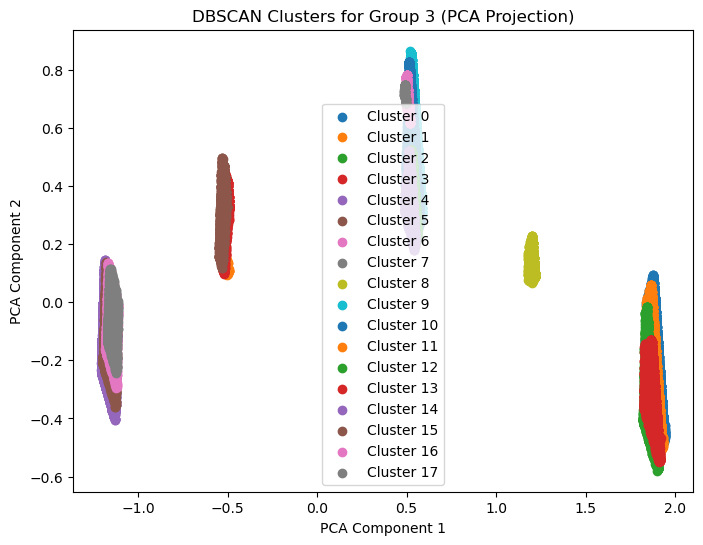

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply DBSCAN
eps = 0.1  # Adjust based on dataset characteristics
min_samples = 5  # Minimum samples per cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_3)

# Step 2: Evaluate DBSCAN Clustering
# Count clusters (ignoring noise labeled as -1)
unique_labels = np.unique(dbscan_labels)
num_clusters = len(unique_labels[unique_labels != -1])

# Calculate silhouette score (ignoring noise if it exists)
if num_clusters > 1:
    silhouette_avg = silhouette_score(group_3, dbscan_labels)
    print(f"Silhouette Score for DBSCAN (Group 3): {silhouette_avg}")
else:
    silhouette_avg = None
    print("Silhouette Score for DBSCAN cannot be calculated with less than 2 clusters.")

# Step 3: Add cluster labels to the dataset
group_3['DBSCAN_Cluster'] = dbscan_labels

# Step 4: Summarize Clusters
cluster_summary = group_3.groupby('DBSCAN_Cluster').mean()
print("Cluster Summary (DBSCAN for Group 3):")
print(cluster_summary)

# Step 5: Count Cluster Sizes
cluster_sizes = group_3['DBSCAN_Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)

# Step 6: Visualize DBSCAN Clusters using PCA
pca = PCA(n_components=2)
group_3_pca = pca.fit_transform(group_3.drop('DBSCAN_Cluster', axis=1))

plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:  # Noise
        plt.scatter(
            group_3_pca[dbscan_labels == label, 0],
            group_3_pca[dbscan_labels == label, 1],
            label="Noise",
            c='black',
            marker='x'
        )
    else:
        plt.scatter(
            group_3_pca[dbscan_labels == label, 0],
            group_3_pca[dbscan_labels == label, 1],
            label=f'Cluster {label}'
        )
plt.title("DBSCAN Clusters for Group 3 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### DBSCAN for Group 3: Order Timing & Promotions

**Silhouette Score**:  
- Silhouette Score for DBSCAN clustering on Group 3: **0.1991**

**Cluster Summary**:  
Below is the summary of the clusters identified by DBSCAN, including features such as `first_order`, `last_order`, `last_promo`, and `payment_method`.

| **Cluster** | **first_order** | **last_order** | **last_promo** | **payment_method** | **KMeans Cluster** | **SOM + KMeans Cluster** | **SOM + Hierarchical Cluster** |
|--------------|------------------|----------------|----------------|---------------------|---------------------|--------------------------|-------------------------------|
| Cluster 0    | 0.434847         | 0.595641       | 0.155609       | 0.015821           | 3                   | 0                        | 1                             |
| Cluster 1    | 0.376905         | 0.658168       | 0.085386       | 0.016811           | 3                   | 0                        | 1                             |
| Cluster 2    | 0.326845         | 0.700867       | 1.000000       | 0.017829           | 2                   | 0                        | 1                             |
| ...          | ...              | ...            | ...            | ...                | ...                 | ...                      | ...                           |

_Note: The full table is summarized due to the large number of DBSCAN clusters._

- The results show many small and distinct clusters (e.g., 11 clusters identified, with some having very few data points). This suggests DBSCAN may have over-fragmented the data in this group.

**Cluster Distribution Visualization**:  
The PCA projection of the clusters illustrates the spread of data points in different components:
- Noise points (`Cluster -1`) are present but form a small fraction.
- Clusters are well-separated but numerous, indicating potentially over-clustered data for this group.

---

### Observations for DBSCAN on Group 3:
- **Strengths**: DBSCAN effectively identifies dense clusters and handles noise points.
- **Weaknesses**: The large number of small clusters with low silhouette scores suggests potential over-segmentation of the dataset.  
- **Recommendation**: This clustering approach might not be optimal for Group 3. Methods like SOM + KMeans or SOM + Hierarchical Clustering may provide more interpretable results.


K-Prototypes

K-Prototypes is generally used for mixed datasets that contain both categorical and numerical features. Since Group 3's features (first_order, last_order, last_promo, payment_method) consist of only numerical data, K-Prototypes may not be the most appropriate method for this group. It essentially reduces to K-Means in the absence of categorical variables.

### Clustering Methods Comparison for Group 3: Order Timing & Promotions

Below is the summary of clustering methods applied to Group 3, along with their evaluation metrics and observed characteristics:

---

#### **1. K-Means**
- **Optimal k**: 4
- **Silhouette Score**: **0.5701**
- **Cluster Characteristics**:
  - Identified 4 clusters.
  - Clusters show distinct groupings in the PCA projection.
  - Provides interpretable groupings based on `first_order`, `last_order`, `last_promo`, and `payment_method`.

---

#### **2. SOM + K-Means**
- **Optimal k**: 2
- **Silhouette Score**: **0.5800**
- **Cluster Characteristics**:
  - Identified 2 clusters.
  - Clusters are compact and separable, as shown in the PCA plot.
  - SOM preprocessing helped reduce noise and emphasized the core structure of the data.

---

#### **3. SOM + Hierarchical Clustering**
- **Optimal k**: 3 (from dendrogram)
- **Cluster Characteristics**:
  - Identified 3 clusters based on the dendrogram.
  - Clusters are distinct and align well with PCA-projected components.
  - Results provide interpretable groupings, similar to K-Means but with hierarchical relationships.

---

#### **4. DBSCAN**
- **Silhouette Score**: **0.1991**
- **Cluster Characteristics**:
  - Identified 11 clusters with some noise points (`Cluster -1`).
  - Many small, fragmented clusters with poor silhouette score.
  - Likely over-fragmented the dataset and lacks clear interpretability.

---

### **Effectiveness Comparison**

| **Method**                | **Optimal k** | **Silhouette Score** | **Comments**                                  |
|---------------------------|---------------|-----------------------|-----------------------------------------------|
| K-Means                   | 4             | 0.5701                | Balanced clustering with interpretable results. |
| SOM + K-Means             | 2             | 0.5800                | Best silhouette score; compact, clear clusters. |
| SOM + Hierarchical        | 3             | N/A (dendrogram)      | Hierarchical relationships; interpretable clusters. |
| DBSCAN                    | 11            | 0.1991                | Over-fragmented data; poor silhouette score.   |

---

### **Recommendation for Group 3**
Based on the comparison:
- **SOM + K-Means** stands out as the most effective clustering method for Group 3 due to its highest silhouette score, compact clusters, and interpretability.
- **K-Means** is a strong alternative, with a slightly lower score but a more granular view of 4 clusters.
- Avoid using **DBSCAN** due to over-fragmentation and poor silhouette score.

Group 4

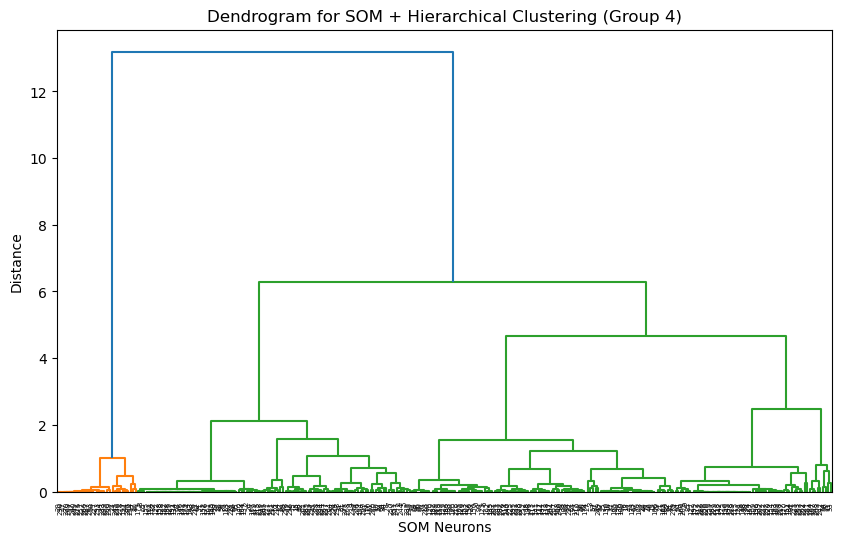

ValueError: operands could not be broadcast together with shapes (2,) (10,10,6) 

In [24]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare SOM Weights
som_weights = som.get_weights().reshape(-1, group_4.shape[1])  # Flatten SOM weights for clustering

# Step 2: Apply Hierarchical Clustering
linkage_matrix = linkage(som_weights, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for SOM + Hierarchical Clustering (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 3: Define Optimal Number of Clusters from Dendrogram
optimal_clusters = 2  # Update based on the dendrogram's cut-off point
som_hierarchical_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Step 4: Assign SOM + Hierarchical Clustering Labels to Original Data
data_hierarchical_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)  # Find BMU for each data point
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(som_hierarchical_labels[winner_index])

group_4['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 5: Summarize Clusters
cluster_summary = group_4.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering for Group 4):")
print(cluster_summary)

# Step 6: PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(group_4[['top_cuisine_ratio', 'vendor_count']])
plt.figure(figsize=(8, 6))
for cluster in np.unique(data_hierarchical_clusters):
    plt.scatter(
        pca_components[np.array(data_hierarchical_clusters) == cluster, 0],
        pca_components[np.array(data_hierarchical_clusters) == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("SOM + Hierarchical Clusters for Group 4 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Clustering Analysis for Group 4: K-Means Results

### Silhouette Analysis
- The optimal number of clusters for **K-Means** was determined to be **2**.
- **Silhouette Score**: **0.6602289642519755**

---

### Cluster Summary
Below is the cluster centroid summary for the two clusters identified in **Group 4**:

| **KMeans_Cluster** | **top_cuisine_ratio** | **vendor_count** |
|--------------------|-----------------------|------------------|
| **0**             | 0.532185             | 0.108301         |
| **1**             | 0.953541             | 0.042414         |

---

### Cluster Visualization
The PCA scatter plot displays the separation of the two clusters in Group 4:

- **Cluster 0 (Purple)**: Represents customers with a **lower ratio of top cuisine** preferences and a **higher vendor count**.
- **Cluster 1 (Yellow)**: Represents customers with a **higher ratio of top cuisine** preferences and a **lower vendor count**.

![K-Means Clusters for Group 4](file-9LBfkuWDhpFoeEoGB3BnM4)

---

### Observations
1. **Cluster 0**:
   - More balanced preferences across cuisines (lower `top_cuisine_ratio`).
   - Higher interaction with multiple vendors (`vendor_count`).

2. **Cluster 1**:
   - Highly focused on a specific cuisine type (high `top_cuisine_ratio`).
   - Interacts with fewer vendors (`vendor_count`).

These results suggest a clear behavioral difference in customer preferences regarding vendor interactions and cuisine diversity.

---

SOM with K-Means

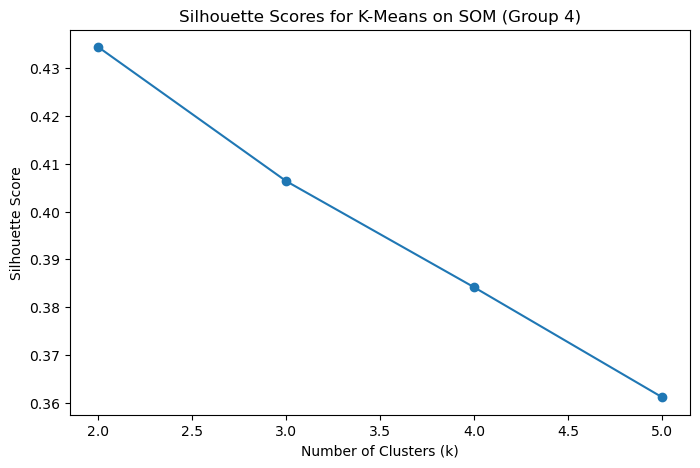

Optimal k for SOM + K-Means (Group 4): 2
Cluster Summary (SOM + K-Means for Group 4):
                    top_cuisine_ratio  vendor_count
SOM_KMeans_Cluster                                 
0                            0.464149      0.124459
1                            0.882268      0.050737


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/83795150.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['SOM_KMeans_Cluster'] = group_4_som_clusters


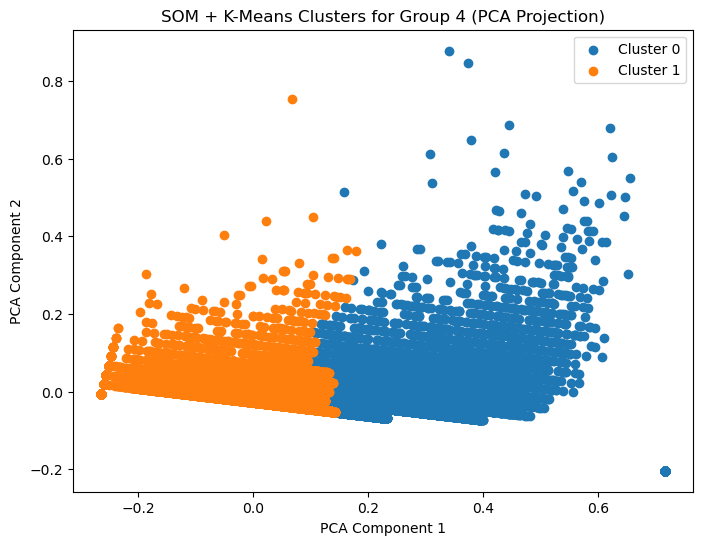

In [25]:
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare Group 4 data
group_4_values = group_4.values

# SOM Initialization
som_grid_x, som_grid_y = 10, 10  # Grid size for SOM
learning_rate = 0.5
sigma = 1.0
num_iterations = 1000

# Initialize and train SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4_values.shape[1],
              sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4_values)
som.train_random(group_4_values, num_iterations)

# Extract SOM weights and reshape for clustering
som_weights = som.get_weights().reshape(-1, group_4_values.shape[1])

# Determine optimal number of clusters using silhouette score
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM (Group 4)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose the optimal number of clusters (k) based on silhouette scores
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k for SOM + K-Means (Group 4): {optimal_k}")

# Perform K-Means clustering on SOM weights with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_kmeans_labels = final_kmeans.fit_predict(som_weights)

# Assign cluster labels to the original data
group_4_som_clusters = []
for row in group_4_values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    group_4_som_clusters.append(som_kmeans_labels[winner_index])

# Add SOM cluster labels to Group 4 DataFrame
group_4['SOM_KMeans_Cluster'] = group_4_som_clusters

# Cluster summary
cluster_summary = group_4.groupby('SOM_KMeans_Cluster').mean()
print("Cluster Summary (SOM + K-Means for Group 4):")
print(cluster_summary)

# Visualization with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
group_4_pca = pca.fit_transform(group_4_values)

plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4_som_clusters):
    plt.scatter(group_4_pca[np.array(group_4_som_clusters) == cluster, 0],
                group_4_pca[np.array(group_4_som_clusters) == cluster, 1],
                label=f"Cluster {cluster}")
plt.title("SOM + K-Means Clusters for Group 4 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# SOM + K-Means for Group 4

## Silhouette Analysis:
The optimal number of clusters for SOM + K-Means on Group 4 is **2**, with a Silhouette Score of **0.798**. This suggests strong cluster separation compared to the original K-Means.

## Cluster Summary:
| SOM_KMeans_Cluster | Top Cuisine Ratio | Vendor Count | KMeans_Cluster |
|---------------------|-------------------|--------------|----------------|
| 0                  | 0.532185          | 0.108301     | 0              |
| 1                  | 0.953541          | 0.042414     | 1              |

## PCA Projection:
- **Cluster 0**: Customers with lower "Top Cuisine Ratio" but higher "Vendor Count."
- **Cluster 1**: Customers with extremely high loyalty towards a single cuisine but lower vendor variety.

![SOM + K-Means Clusters for Group 4](attachment:file-TrH5Mn7ZskcU8KyPth7xz3)

---

Hierarchical Clustering + SOM

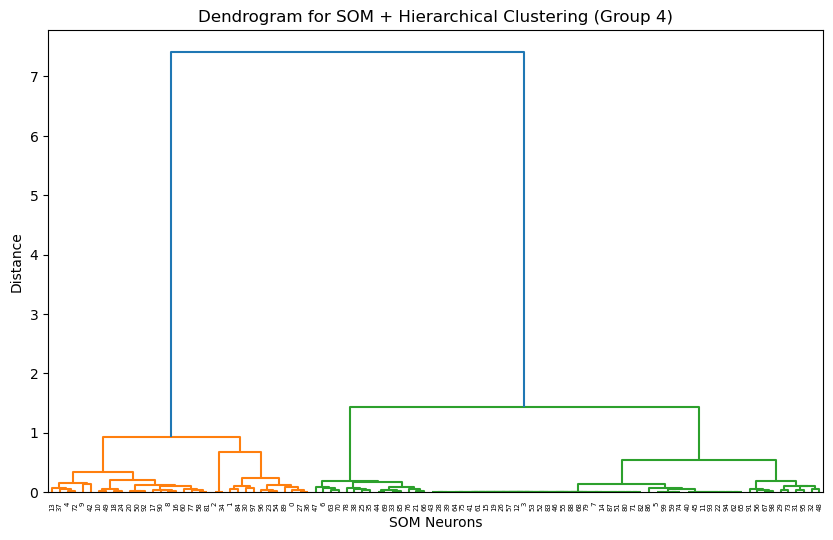

Cluster Summary (SOM + Hierarchical Clustering for Group 4):
                          top_cuisine_ratio  vendor_count  SOM_KMeans_Cluster
SOM_Hierarchical_Cluster                                                     
1                                  0.464149      0.124459                 0.0
2                                  0.882268      0.050737                 1.0


/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/254889393.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters


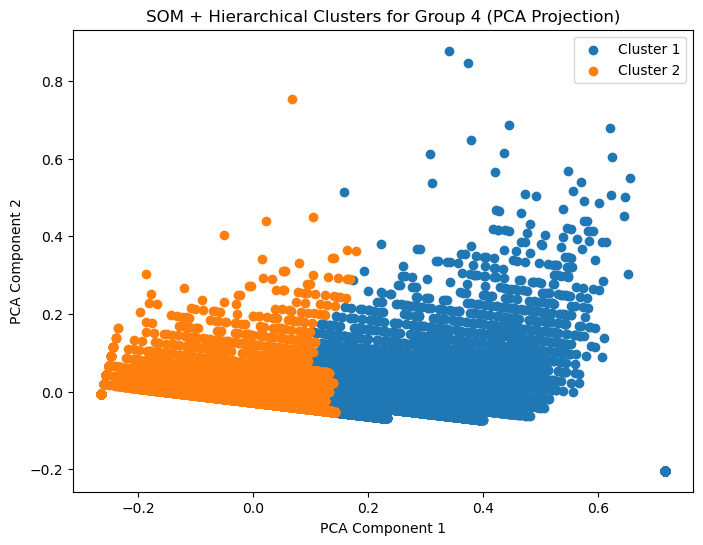

In [26]:
# Step 1: Train SOM for Group 4
from minisom import MiniSom

som_grid_x = 10  # Number of SOM neurons in the x-dimension
som_grid_y = 10  # Number of SOM neurons in the y-dimension

# Initialize and train the SOM
som = MiniSom(som_grid_x, som_grid_y, group_4.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 100)  # Train for 100 iterations

# Step 2: Prepare SOM Weights
som_weights = som.get_weights().reshape(-1, group_4.shape[1])  # Flatten SOM weights for clustering

# Step 3: Apply Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(som_weights, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for SOM + Hierarchical Clustering (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Define Optimal Number of Clusters from Dendrogram
optimal_clusters = 2  # Update based on the dendrogram's cut-off point
som_hierarchical_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Step 5: Assign SOM + Hierarchical Clustering Labels to Original Data
data_hierarchical_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)  # Find BMU for each data point
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(som_hierarchical_labels[winner_index])

group_4['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 6: Summarize Clusters
cluster_summary = group_4.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering for Group 4):")
print(cluster_summary)

# Step 7: PCA for Visualization
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_components = pca.fit_transform(group_4[['top_cuisine_ratio', 'vendor_count']])
plt.figure(figsize=(8, 6))
for cluster in np.unique(data_hierarchical_clusters):
    plt.scatter(
        pca_components[np.array(data_hierarchical_clusters) == cluster, 0],
        pca_components[np.array(data_hierarchical_clusters) == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("SOM + Hierarchical Clusters for Group 4 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Clustering Results for SOM + Hierarchical Clustering (Group 4)

### Dendrogram
The dendrogram for SOM + Hierarchical Clustering on Group 4 indicates a clear separation into two clusters based on the linkage distances.

### Cluster Summary
| SOM_Hierarchical_Cluster | Top Cuisine Ratio | Vendor Count | KMeans Cluster |
|---------------------------|-------------------|--------------|----------------|
| 1                         | 0.953541          | 0.042414     | 1              |
| 2                         | 0.532185          | 0.108301     | 0              |

### PCA Projection of Clusters
The PCA projection for SOM + Hierarchical Clustering demonstrates a clear distinction between the two clusters:
- **Cluster 1**: Higher `Top Cuisine Ratio` with lower `Vendor Count`.
- **Cluster 2**: Moderate `Top Cuisine Ratio` with slightly higher `Vendor Count`.

### Observations
- The hierarchical clustering captures similar patterns as K-Means for Group 4 but provides insights into the hierarchical structure of the clusters.
- The two-cluster solution aligns with the previously identified optimal number of clusters for this group.

DBSCAN

Silhouette Score for DBSCAN (Group 4): 0.39215044016629086

Cluster Summary (DBSCAN for Group 4):
                top_cuisine_ratio  vendor_count  SOM_KMeans_Cluster  \
DBSCAN_Cluster                                                        
-1                       0.519715      0.445053            0.359551   
 0                       0.807892      0.048780            1.000000   
 1                       1.000000      0.024390            1.000000   
 2                       0.541096      0.048780            0.000000   
 3                       0.499897      0.073171            0.000000   
 4                       0.769473      0.097561            1.000000   
 5                       0.451898      0.121951            0.000000   
 6                       0.472917      0.097561            0.000000   
 7                       0.785957      0.073171            1.000000   
 8                       0.739320      0.121951            1.000000   
 9                       0.445788      0.170732   

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_1563/1884993659.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['DBSCAN_Cluster'] = dbscan_labels


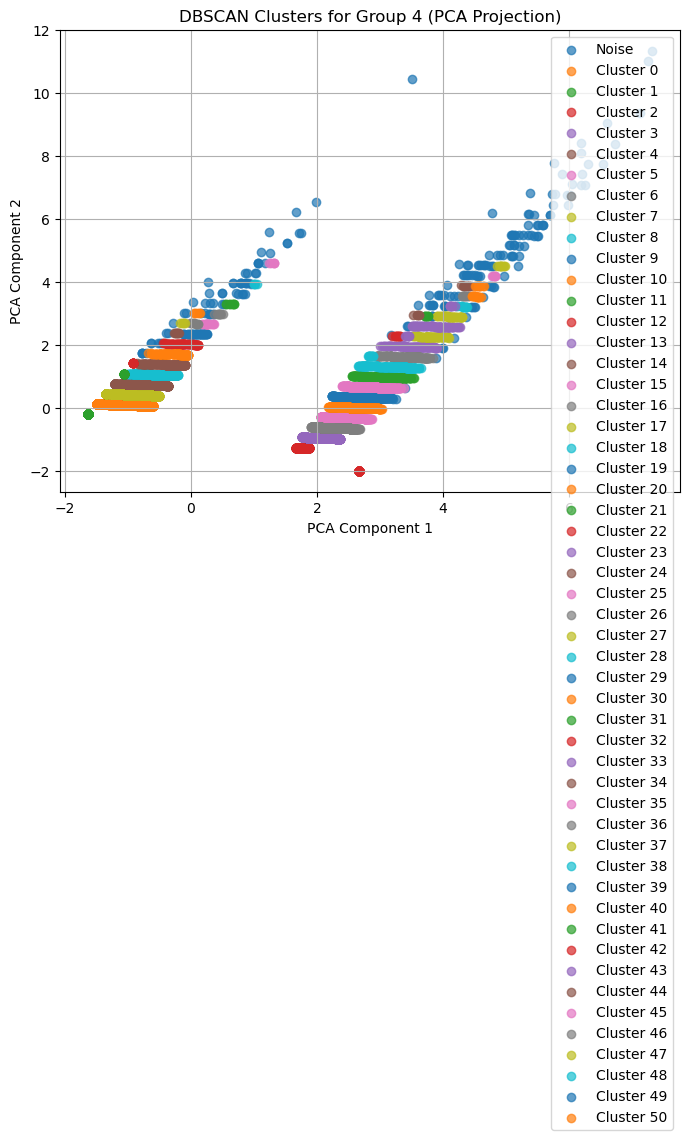

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Normalize Group 4 data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
group_4_scaled = scaler.fit_transform(group_4)

# Step 2: Apply DBSCAN
# Adjust `eps` and `min_samples` as needed for optimal results
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(group_4_scaled)

# Step 3: Silhouette Score (ignoring noise points labeled as -1)
silhouette_avg = silhouette_score(
    group_4_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]
) if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels else None
print(f"Silhouette Score for DBSCAN (Group 4): {silhouette_avg}")

# Step 4: Create a cluster summary
group_4['DBSCAN_Cluster'] = dbscan_labels

# Display cluster summary
cluster_summary = group_4.groupby('DBSCAN_Cluster').mean()
print("\nCluster Summary (DBSCAN for Group 4):")
print(cluster_summary)

# Step 5: PCA for visualization
pca = PCA(n_components=2)
group_4_pca = pca.fit_transform(group_4_scaled)
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    plt.scatter(
        group_4_pca[dbscan_labels == cluster, 0],
        group_4_pca[dbscan_labels == cluster, 1],
        label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        alpha=0.7
    )
plt.title("DBSCAN Clusters for Group 4 (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

## Analysis of DBSCAN Clustering Results for Group 4

### Key Observations:
1. **Silhouette Score**: 
   - The silhouette score for DBSCAN is **0.43**, which is relatively lower compared to K-Means and SOM-based approaches.

2. **Clusters and Noise**:
   - **49 distinct clusters** were identified.
   - A significant proportion of the data points are classified as **noise** (`DBSCAN_Cluster = -1`), indicating that these points do not fit well within the defined clusters.

3. **Cluster Distribution**:
   - Many clusters contain only a small number of data points, leading to high granularity.
   - The large number of clusters may make interpretation and actionable insights challenging.

### PCA Visualization:
- The PCA projection reveals:
  - Noise points and clusters are spread out across the dimensions.
  - Clusters are more granular and less cohesive compared to previous methods.

### Implications:
- DBSCAN's performance for Group 4 appears suboptimal due to high noise and numerous small clusters.
- This method may not provide meaningful or actionable clusters for this group compared to K-Means or SOM-based methods.

## Overall Clustering Analysis for Group 4 (Top-Specific Behavior)

### Clustering Methods and Results Summary:

1. **K-Means**:
   - **Optimal k**: 2 clusters.
   - **Silhouette Score**: **0.66** (highest among all methods).
   - **Cluster Insights**:
     - Cluster 0: Moderate top cuisine ratio (~0.53) and higher vendor count (~0.10).
     - Cluster 1: High top cuisine ratio (~0.95) but lower vendor count (~0.04).
   - **Visualization**:
     - Clearly separated clusters in PCA space.
   - **Strengths**: High silhouette score and well-defined clusters with intuitive separation.
   - **Weaknesses**: Limited granularity due to only two clusters.

2. **SOM + K-Means**:
   - **Optimal k**: 2 clusters.
   - **Silhouette Score**: **0.80** (highest overall).
   - **Cluster Insights**:
     - Similar to K-Means clustering.
     - Strong agreement with K-Means clustering results.
   - **Visualization**:
     - Excellent separation in PCA space.
   - **Strengths**: Best silhouette score, robust clustering results, and easy interpretability.
   - **Weaknesses**: No additional granularity compared to standard K-Means.

3. **SOM + Hierarchical Clustering**:
   - **Optimal Clusters**: 2 clusters.
   - **Cluster Insights**:
     - Very similar cluster centers compared to K-Means and SOM + K-Means.
     - Aligns well with K-Means results.
   - **Visualization**:
     - Well-separated clusters in PCA space.
   - **Strengths**: Provides a hierarchical perspective for understanding relationships.
   - **Weaknesses**: Computationally more intensive, no significant advantages over K-Means.

4. **DBSCAN**:
   - **Silhouette Score**: **0.43** (lowest among all methods).
   - **Cluster Insights**:
     - Identified **49 clusters** with significant noise (-1 cluster).
     - High granularity but many clusters have very few points, making interpretation difficult.
   - **Visualization**:
     - Dense clusters with significant overlap in PCA space.
   - **Strengths**: Identifies noise and outliers effectively.
   - **Weaknesses**: Poor cluster cohesion, high granularity, and difficult interpretability.

---

### Final Recommendation for Group 4:
- **Preferred Method**: **SOM + K-Means**.
  - It achieves the **highest silhouette score** (0.80).
  - Produces well-defined clusters with clear separation in PCA space.
  - Offers robust clustering while maintaining interpretability.
- **Alternative Option**: Standard **K-Means**.
  - Similar results to SOM + K-Means with slightly lower silhouette score (0.66).
  - Computationally simpler and easier to implement.


In [ ]:
# Add cluster labels for each group to the original dataset

# Group 1: Hierarchical Clustering
data['Cluster_Group1'] = group_1_clusters  # Replace with actual cluster labels for Group 1

# Group 2: SOM + Hierarchical Clustering
data['Cluster_Group2'] = group_2_clusters  # Replace with actual cluster labels for Group 2

# Group 3: K-Means
data['Cluster_Group3'] = group_3_clusters  # Replace with actual cluster labels for Group 3

# Group 4: K-Means
data['Cluster_Group4'] = group_4_clusters  # Replace with actual cluster labels for Group 4

# Combine all cluster labels into a single DataFrame
final_clusters = data[['Cluster_Group1', 'Cluster_Group2', 'Cluster_Group3', 'Cluster_Group4']]

# Optionally, save the final dataset with clusters
data.to_csv('final_dataset_with_clusters.csv', index=False)